In [1]:
# importing required libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Steps :

    A. missing value
    B. outlier
    C. analyse imbalance
    D. uni, bivariate analysis
    E. top correlations

# <span style="background-color:yellow">IMPORTING AND UNDERSTANDING DATASET

In [2]:
# importing application_data
pd.set_option("display.max_rows", None, "display.max_columns", None)
app_data = pd.read_csv(r"D:\data science projects\trainity projects data analytics\poject -6 bank Loan Case Study\application_data (2).csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [3]:
# shape
app_data.shape

(49999, 122)

In [4]:
# data info
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 46.5+ MB


In [5]:
# importing prev_application_data
prev_app_data = pd.read_csv(r"D:\data science projects\trainity projects data analytics\poject -6 bank Loan Case Study\previous_application (3).csv")
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# shape
prev_app_data.shape

(49999, 37)

In [7]:
# data info
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   49999 non-null  int64  
 1   SK_ID_CURR                   49999 non-null  int64  
 2   NAME_CONTRACT_TYPE           49999 non-null  object 
 3   AMT_ANNUITY                  39407 non-null  float64
 4   AMT_APPLICATION              49999 non-null  float64
 5   AMT_CREDIT                   49999 non-null  float64
 6   AMT_DOWN_PAYMENT             24801 non-null  float64
 7   AMT_GOODS_PRICE              39255 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   49999 non-null  object 
 9   HOUR_APPR_PROCESS_START      49999 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  49999 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       49999 non-null  int64  
 12  RATE_DOWN_PAYMENT            24801 non-null  float64
 13  RATE_INTEREST_PR

# <font color='blue'>DATA CLEANING

### <span style="background-color:yellow">Handling Missing Values

### application_data

In [8]:
# % missing values 
perc_missing = round(app_data.isnull().sum()/app_data.shape[0]*100,3)
perc_missing

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.002
AMT_GOODS_PRICE                  0.076
NAME_TYPE_SUITE                  0.384
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
REGION_POPULATION_RELATIVE       0.000
DAYS_BIRTH                       0.000
DAYS_EMPLOYED                    0.000
DAYS_REGISTRATION                0.000
DAYS_ID_PUBLISH                  0.000
OWN_CAR_AGE                     65.901
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_CONT_MOBILE         

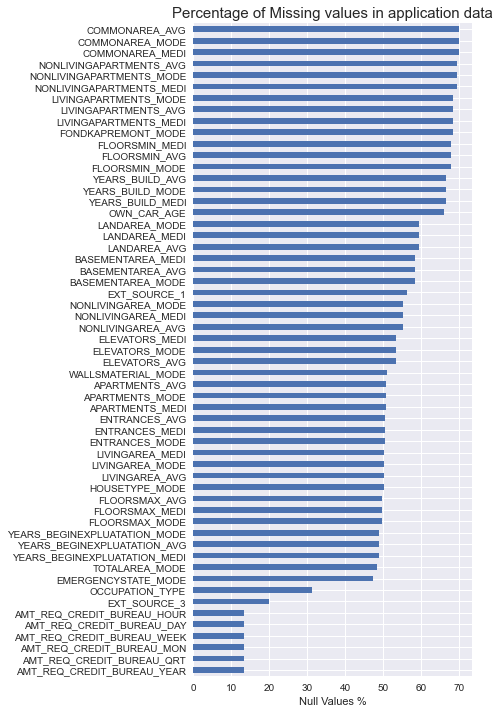

In [9]:
# visualising missing data
plt.style.use("seaborn")
plt.figure(figsize=(5,12))
perc_missing[perc_missing>1].sort_values(ascending=True).plot.barh()
plt.title("Percentage of Missing values in application data",fontdict=({"size":15}))
plt.xlabel("Null Values %")
plt.show()

- **removing columns** of application_data have missing values **more than 40%**

In [10]:
app_data=app_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

round(app_data.isnull().sum()/app_data.shape[0]*100,3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.002
AMT_GOODS_PRICE                 0.076
NAME_TYPE_SUITE                 0.384
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MOBILE                0.000
FLAG_PHONE                      0.000
FLAG_EMAIL  

In [11]:
# shape after dropping
app_data.shape

(49999, 70)

In [12]:
# looking numerical summary of var with null 
app_data[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
          "AMT_REQ_CREDIT_BUREAU_YEAR"]].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000,43265.000000
mean,0.007096,0.007512,0.032382,0.270288,0.260973,1.881035
std,0.087709,0.107992,0.194080,0.928560,0.606996,1.865054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


- **median** values of all these var is 0, thus **imputing 0** inplace of null values.

In [13]:
app_data[["AMT_REQ_CREDIT_BUREAU_HOUR",
          "AMT_REQ_CREDIT_BUREAU_DAY",
          "AMT_REQ_CREDIT_BUREAU_WEEK",
          "AMT_REQ_CREDIT_BUREAU_MON",
          "AMT_REQ_CREDIT_BUREAU_QRT",
          "AMT_REQ_CREDIT_BUREAU_YEAR"]] = app_data[["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT",
                                                     "AMT_REQ_CREDIT_BUREAU_YEAR"]].fillna(0)


In [14]:
# looking numerical summary of rest variables with null values
app_data[["OBS_30_CNT_SOCIAL_CIRCLE",
          "DEF_30_CNT_SOCIAL_CIRCLE",      
          "OBS_60_CNT_SOCIAL_CIRCLE",       
          "DEF_60_CNT_SOCIAL_CIRCLE"]].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,49831.000000,49831.000000,49831.000000,49831.000000
mean,1.420782,0.141819,1.403664,0.098332
std,2.302086,0.440540,2.281782,0.357264
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,28.000000,6.000000,28.000000,5.000000


- **median** values of all these var is 0, thus **imputing 0** inplace of null values.

In [15]:
app_data[["OBS_30_CNT_SOCIAL_CIRCLE",
          "DEF_30_CNT_SOCIAL_CIRCLE",      
          "OBS_60_CNT_SOCIAL_CIRCLE",       
          "DEF_60_CNT_SOCIAL_CIRCLE"]] = app_data[["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",       
                                                   "DEF_60_CNT_SOCIAL_CIRCLE"]].fillna(0)

- rest variables have **insignificant** null rows thus **dropping** the rest null rows.

In [16]:
# dropping insignificant null rows
app_data = app_data.dropna()
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

In [17]:
# final shape
app_data.shape

(49805, 70)

#### Removed null values
- **removed** all the **null values** from the application_data dropping **52 columns** and **194 rows**
- all variable with missing values **greater than 40%** are **dropped.**
- varibles with missing values **below 13%** are **imputed** with **median** values.
- **insignificant null rows** of variables are **removed.**

### <span style="background-color:yellow">Handling Outlier Values

In [18]:
# looking for variables with outliers
app_data.describe(percentiles=[.25,.50,.75,.90,.99])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,49805.000000,49805.000000,49805.000000,4.980500e+04,4.980500e+04,49805.000000,4.980500e+04,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.0,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.0,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000,49805.000000
mean,129017.346451,0.080695,0.420078,1.707225e+05,5.993058e+05,27112.538852,5.385158e+05,0.020793,-16025.517418,63267.525188,-4978.645196,-2997.005582,1.0,0.821343,0.199096,0.997972,0.277422,0.055717,2.159221,2.052184,2.031222,12.049634,0.014998,0.049774,0.039474,0.079851,0.232085,0.179641,1.416384,0.141371,1.399317,0.097962,-965.991547,0.000040,0.712619,0.000181,0.015420,0.086558,0.000181,0.080695,0.003634,0.000020,0.004216,0.0,0.003152,0.002992,0.000803,0.009557,0.000301,0.008252,0.000663,0.000522,0.000361,0.006124,0.006505,0.028090,0.234113,0.225901,1.631362
std,16691.698761,0.272368,0.724070,5.327938e+05,4.017988e+05,14556.285324,3.692113e+05,0.013755,4360.033268,140836.050160,3525.498479,1509.556362,0.0,0.383068,0.399325,0.044987,0.447731,0.229377,0.911463,0.508133,0.502353,3.252558,0.121548,0.217480,0.194722,0.271066,0.422167,0.383892,2.300357,0.440081,2.280050,0.356763,829.218887,0.006337,0.452545,0.013442,0.123218,0.281188,0.013442,0.272368,0.060175,0.004481,0.064798,0.0,0.056057,0.054615,0.028328,0.097294,0.017352,0.090467,0.025732,0.022842,0.019008,0.081540,0.100586,0.181115,0.868448,0.571408,1.851365
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25184.000000,-17531.000000,-22392.000000,-6232.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114572.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16488.000000,2.385000e+05,0.010006,-19646.000000,-2787.000000,-7465.000000,-4297.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1574.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [19]:
numeric_cols = app_data.select_dtypes(include=[float, int]).columns

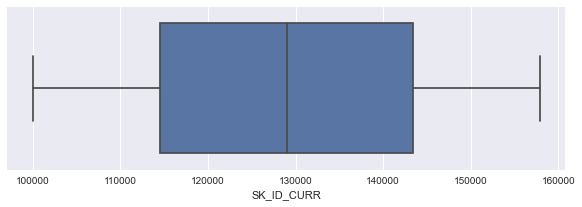

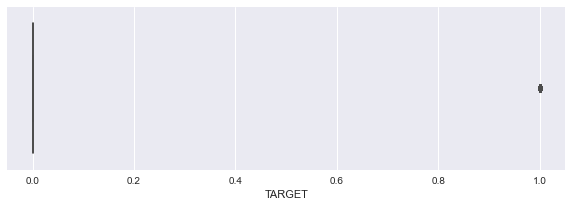

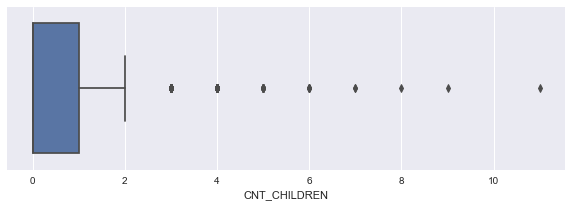

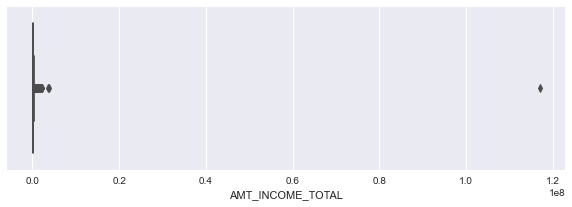

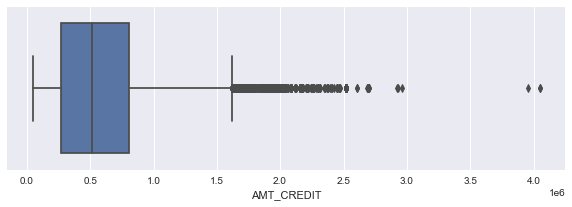

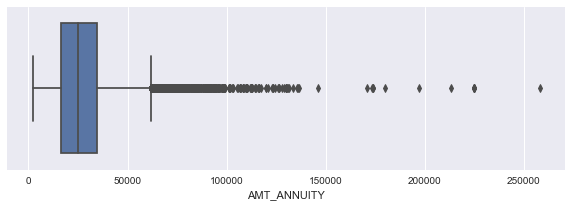

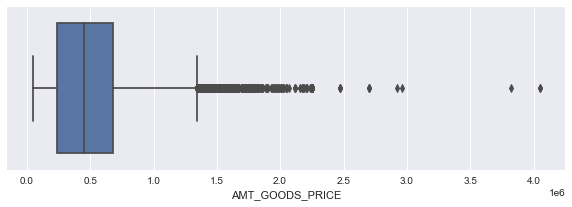

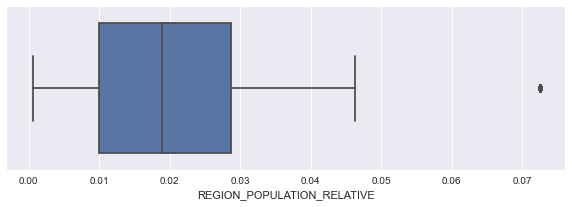

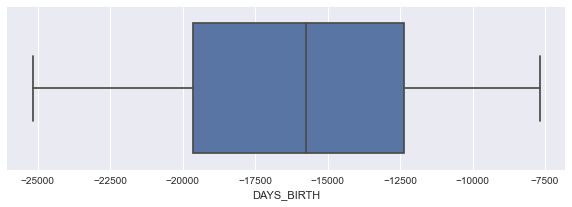

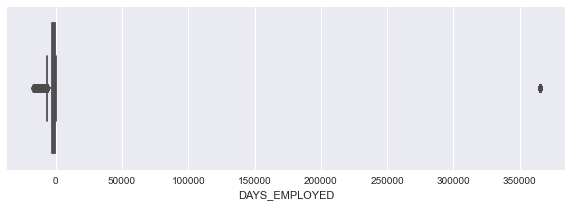

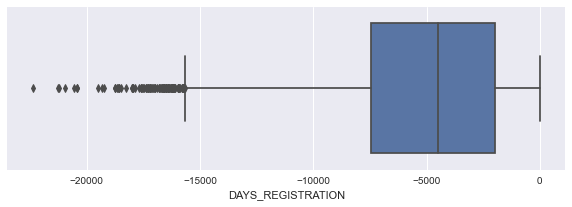

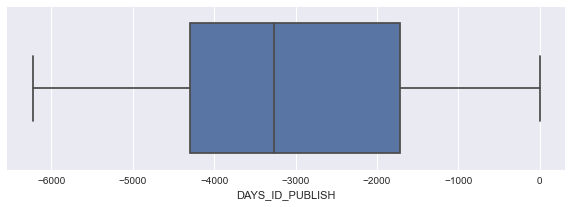

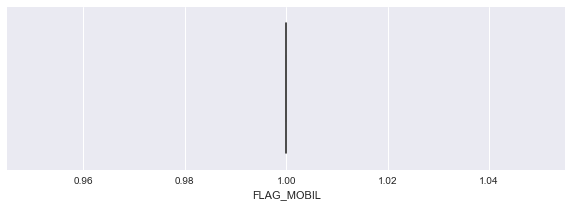

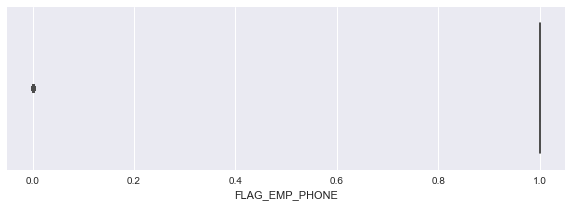

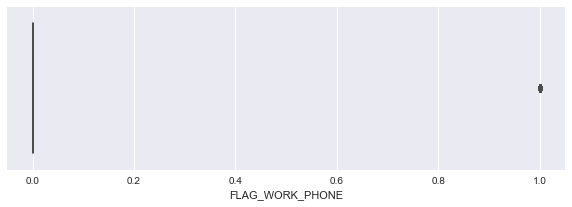

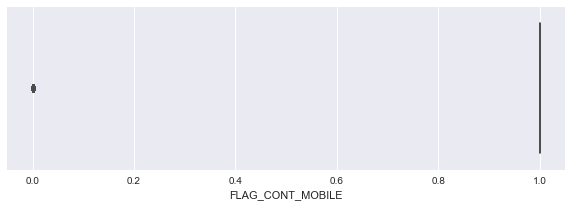

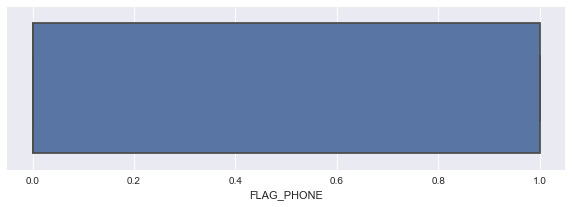

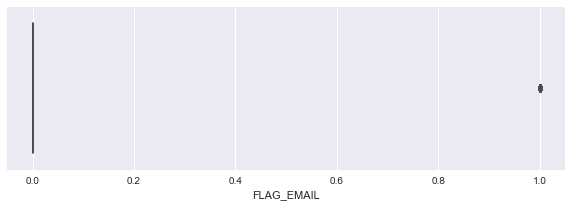

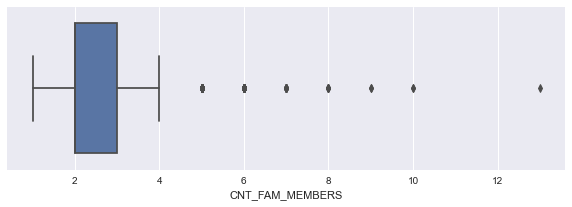

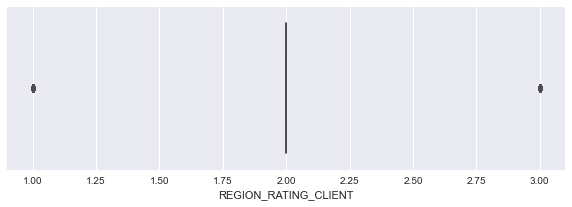

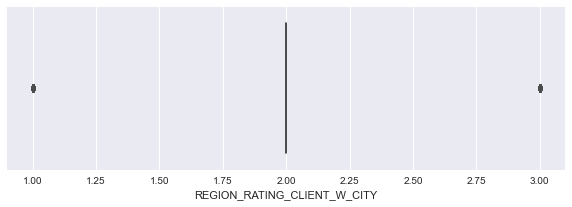

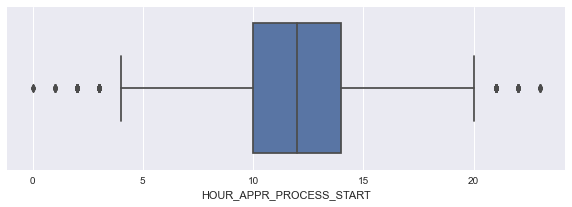

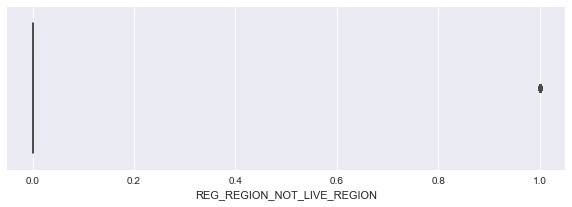

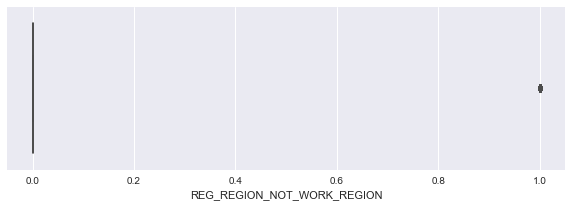

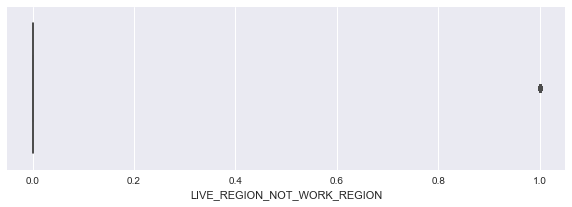

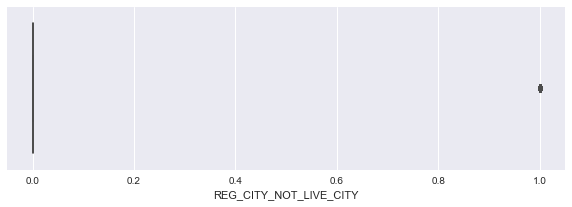

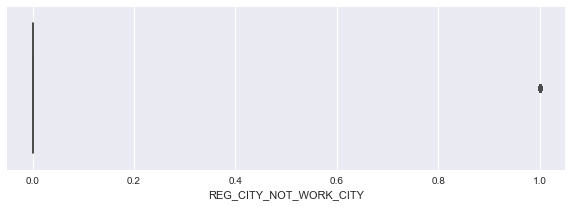

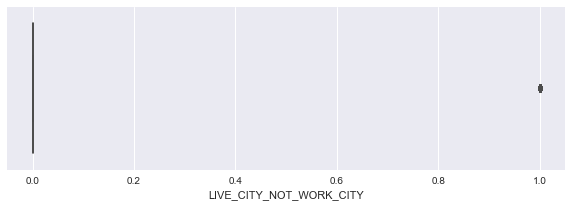

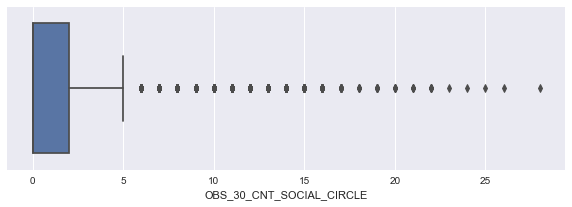

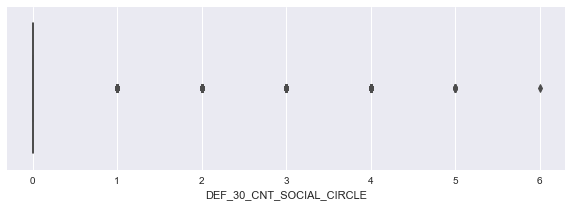

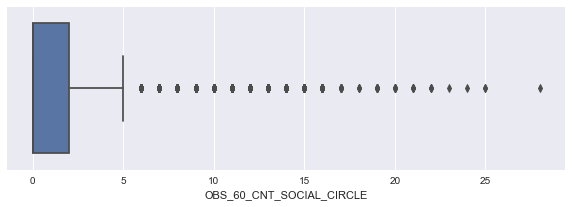

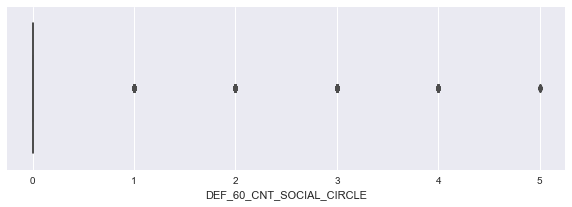

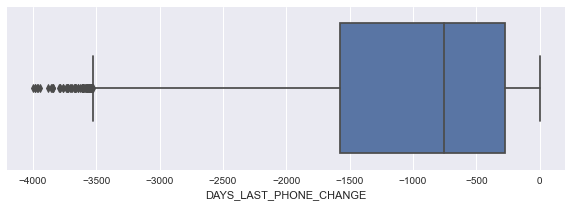

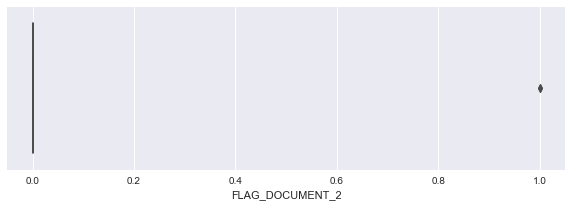

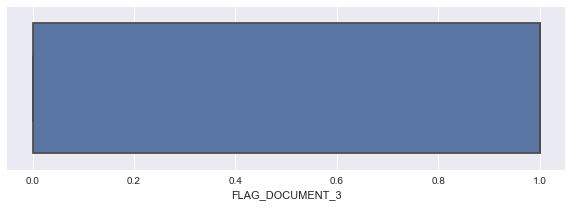

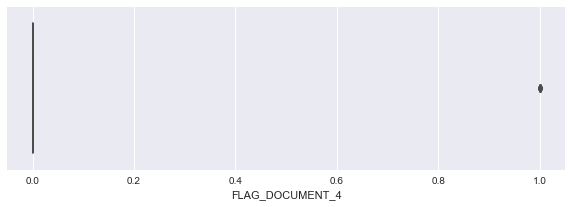

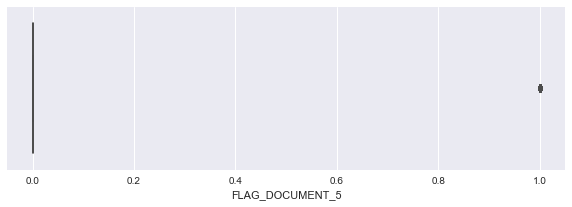

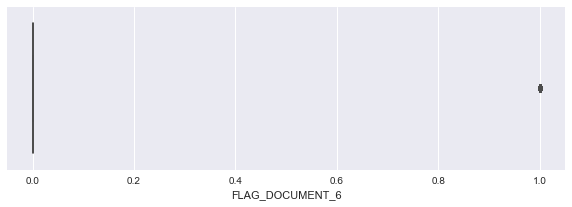

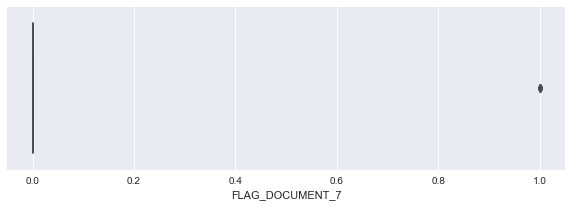

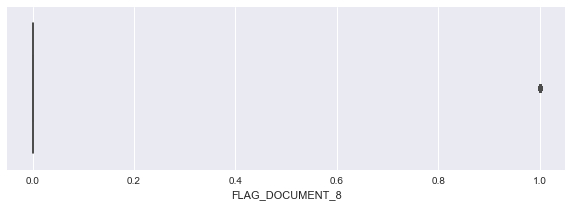

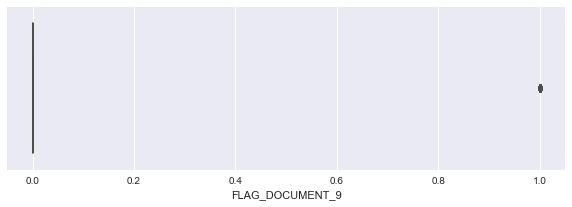

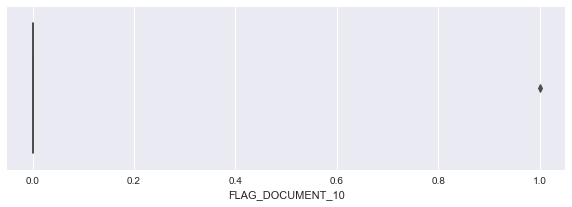

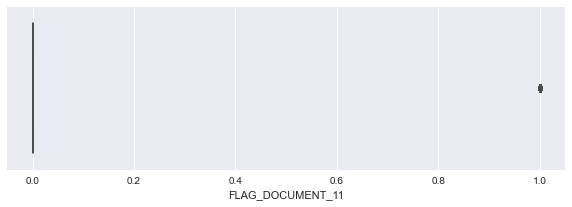

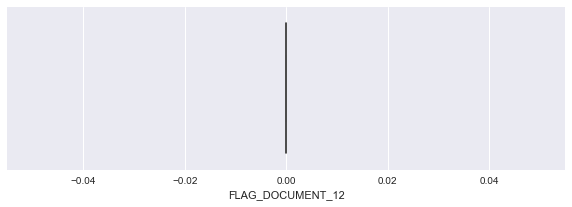

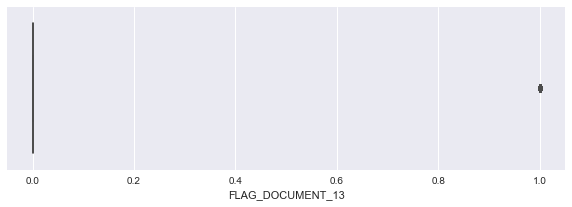

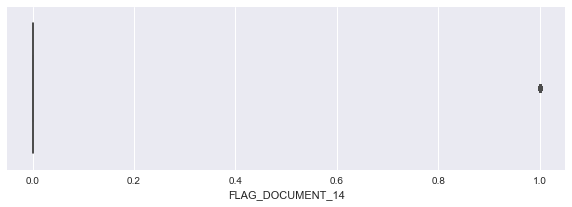

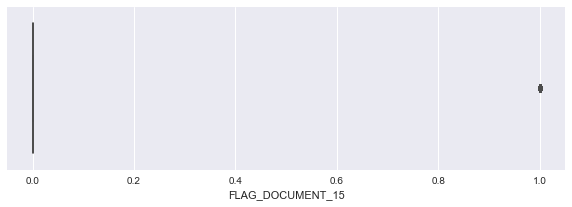

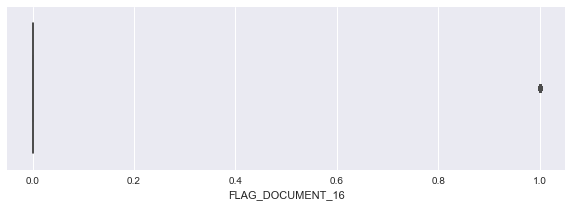

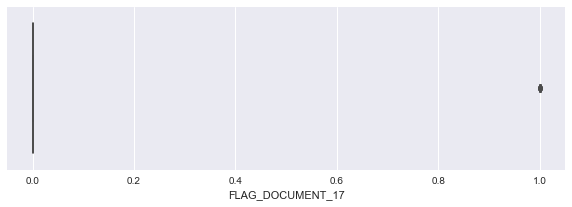

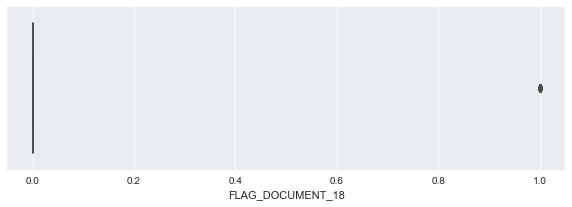

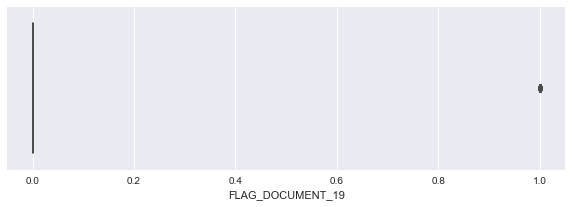

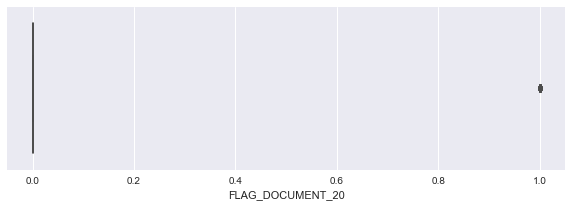

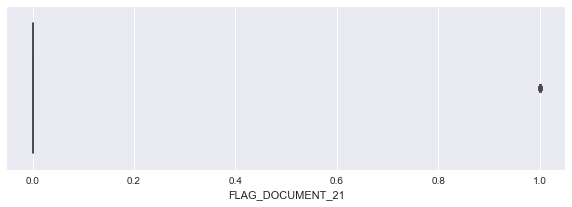

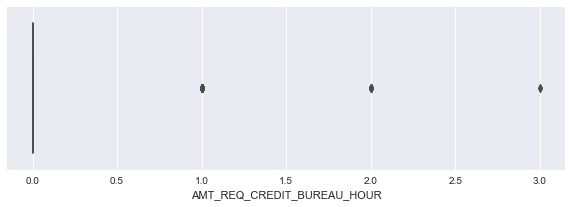

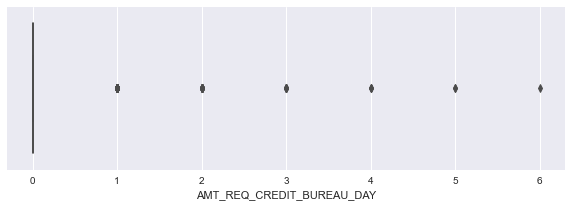

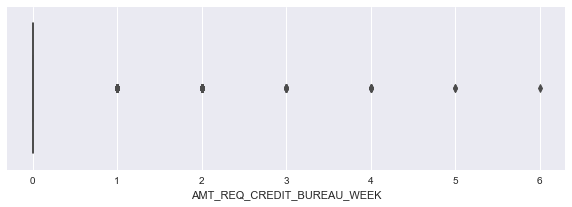

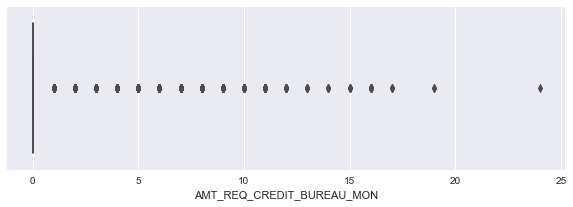

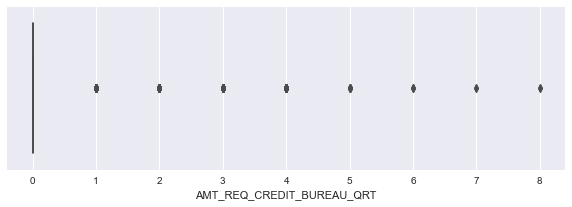

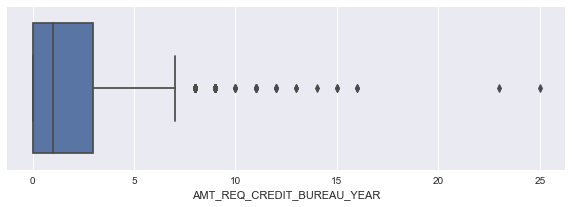

In [20]:
for i in numeric_cols:
    plt.figure(figsize=(10,3))
    sns.boxplot(app_data[i])
    

- <b>CNT_CHILDREN, AMT_INCOME_TOTAL,  AMT_CREDIT,  AMT_ANNUITY,  AMT_GOODS_PRICE,  DAYS_REGISTRATION,  CNT_FAM_MEMBERS,  DAYS_LAST_PHONE_CHANGE etc.</b> variables have outliers, handling outlier one by one.

### CNT_CHILDREN

In [21]:
# looking and removing outliers of CNT_CHILDREN
app_data["CNT_CHILDREN"].describe(percentiles=[.25,.5,.75,.90,.99])

count    49805.000000
mean         0.420078
std          0.724070
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
90%          2.000000
99%          3.000000
max         11.000000
Name: CNT_CHILDREN, dtype: float64

- **median** children count is 0, where as **99% perecentile** is **3**
- **max** is **11**

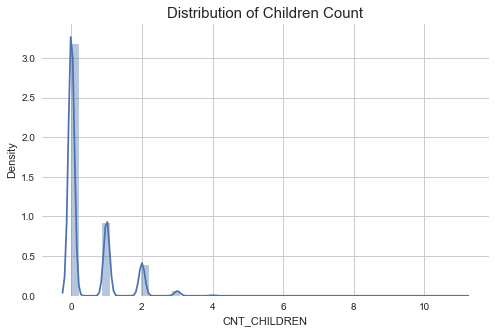

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=[8,5])
sns.distplot(app_data['CNT_CHILDREN']) 
plt.title("Distribution of Children Count",fontdict={"size":15})
plt.show()

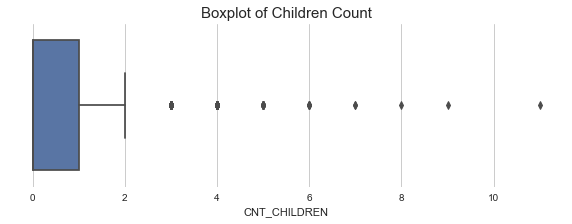

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(app_data['CNT_CHILDREN']) 
plt.title("Boxplot of Children Count",fontdict={"size":15})
plt.show()

In [24]:
# looking outlier data
app_data[app_data.CNT_CHILDREN > 6]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
3079,103596,0,Cash loans,M,N,Y,7,85500.0,411813.0,17577.0,355500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.007120,-17676,-1065,-2527,-1206,1,1,0,1,0,0,9.0,2,2,FRIDAY,9,0,0,0,0,0,0,Housing,2.0,0.0,2.0,0.0,-66.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,1.0
12615,114709,0,Cash loans,M,Y,N,8,112500.0,755190.0,29947.5,675000.0,Unaccompanied,State servant,Higher education,Married,Municipal apartment,0.006207,-15197,-6252,-5009,-5004,1,1,1,1,0,0,10.0,2,2,WEDNESDAY,11,0,0,0,1,1,0,School,0.0,0.0,0.0,0.0,-1049.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
23881,127782,1,Cash loans,F,N,N,9,180000.0,640080.0,31131.0,450000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,Municipal apartment,0.006629,-10929,-1042,-950,-3447,1,1,1,1,0,0,10.0,2,2,THURSDAY,14,0,0,0,0,0,0,Self-employed,3.0,1.0,3.0,1.0,-365.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
26195,130468,0,Cash loans,F,Y,Y,7,180000.0,1288350.0,41692.5,1125000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-15022,-95,-194,-1823,1,1,0,1,0,0,9.0,3,3,THURSDAY,7,0,0,0,0,0,0,Industry: type 4,6.0,0.0,6.0,0.0,-1760.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
34545,140032,1,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,927000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-17308,-198,-3940,-844,1,1,0,1,0,0,13.0,2,2,FRIDAY,17,0,0,0,0,1,1,Other,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- **all values seems valid** these are the borrowers with just  high children count, thus **leaving data as it is.**

### AMT_INCOME_TOTAL

In [25]:
# looking and removing outliers of CNT_CHILDREN
pd.set_option('display.float_format', lambda x: '%.2f' % x)
app_data["AMT_INCOME_TOTAL"].describe(percentiles=[.25,.5,.75,.90,.99])

count       49805.00
mean       170722.46
std        532793.77
min         25650.00
25%        112500.00
50%        144000.00
75%        202500.00
90%        270000.00
99%        472500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

- **median** client **income** is **~1.5lakhs**, where as **99% perecentile** is **~5lakhs**
- **max** is **11cr**

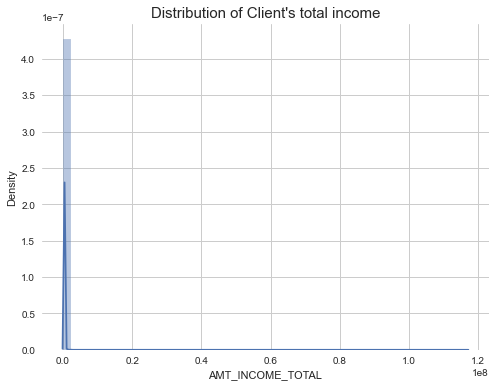

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=[8,6])
sns.distplot(app_data['AMT_INCOME_TOTAL']) 
plt.title("Distribution of Client's total income",fontdict={"size":15})
plt.show()

- income distribution is right skewed with **most** of the clients having very **low income**.

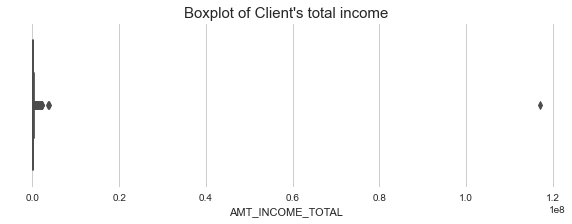

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(app_data['AMT_INCOME_TOTAL']) 
plt.title("Boxplot of Client's total income",fontdict={"size":15})
plt.show()

- some clients present with **extremely high income.**

In [28]:
# looking outlier data
app_data[app_data.AMT_INCOME_TOTAL > 10000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.00,562491.00,26194.50,454500.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.01,-12615,-922,-6762,-3643,1,1,0,1,0,0,3.00,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00


- oultlier income data of this client **seems valid**, he is the borrowers with just very high income, thus **removing him from our data analysis** as it will **interupt or distort** our further analysis for **general trend.**

In [29]:
app_data = app_data[~(app_data.AMT_INCOME_TOTAL > 10000000)]

### looking income data after removing very high value

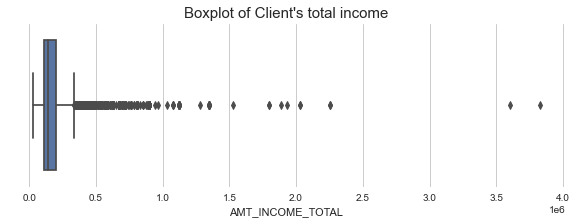

In [30]:
plt.figure(figsize=[10,3])
sns.boxplot(app_data['AMT_INCOME_TOTAL']) 
plt.title("Boxplot of Client's total income",fontdict={"size":15})
plt.show()

- oultlier incomes are **still present** in our data doing further analysis.

In [31]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
app_data["AMT_INCOME_TOTAL"].describe(percentiles=[.25,.5,.75,.90,.99])

count     49804.00
mean     168376.68
std       99035.31
min       25650.00
25%      112500.00
50%      144000.00
75%      202500.00
90%      270000.00
99%      472500.00
max     3825000.00
Name: AMT_INCOME_TOTAL, dtype: float64

- these are valid data with very high incomes, thus **keeping all data as it is** and using **quantiles instead of mean** for income analysis.

### AMT_CREDIT

In [32]:
# looking and removing outliers of CNT_CHILDREN
app_data["AMT_CREDIT"].describe(percentiles=[.25,.5,.75,.90,.99])

count     49804.00
mean     599306.50
std      401802.82
min       45000.00
25%      270000.00
50%      514602.00
75%      808650.00
90%     1130760.00
99%     1832908.41
max     4050000.00
Name: AMT_CREDIT, dtype: float64

- **median** AMT_CREDIT is **~5lakhs** , where as **99% perecentile** is **18Lakhs**
- **max** is **~40lakhs**

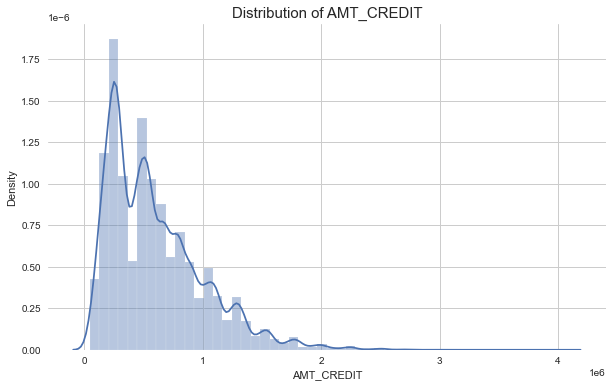

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,6])
sns.distplot(app_data['AMT_CREDIT']) 
plt.title("Distribution of AMT_CREDIT",fontdict={"size":15})
plt.show()

- amount credit distribution is **approx. normal**

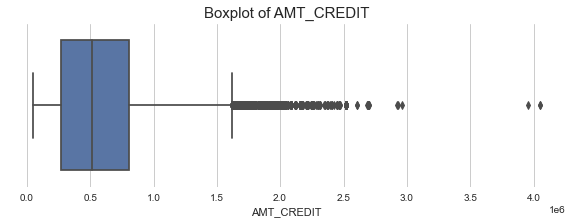

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(app_data['AMT_CREDIT']) 
plt.title("Boxplot of AMT_CREDIT",fontdict={"size":15})
plt.show()

- outlier credit amount is present beyond **25lakhs**

In [35]:
# looking outlier data
app_data[app_data.AMT_CREDIT > 2500000].sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47031,154475,0,Cash loans,M,Y,Y,0,225000.00,2517300.00,66532.50,2250000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.01,-19499,-11812,-10035,-2829,1,1,0,1,0,0,2.00,3,3,TUESDAY,12,0,0,0,0,0,0,Industry: type 11,0.00,0.00,0.00,0.00,-547.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2.00
8940,110403,1,Cash loans,M,Y,Y,0,315000.00,2961000.00,105511.50,2961000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.01,-22484,-1445,-4886,-5038,1,1,0,1,0,0,2.00,3,3,TUESDAY,11,0,0,0,0,0,0,Industry: type 9,8.00,0.00,8.00,0.00,-1624.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
8103,109450,0,Cash loans,F,N,N,0,234000.00,2695500.00,77382.00,2250000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.05,-20439,-267,-4132,-3916,1,1,0,1,0,0,2.00,1,1,WEDNESDAY,11,0,0,0,0,1,1,Business Entity Type 3,2.00,0.00,1.00,0.00,-1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
44244,151250,0,Cash loans,F,N,N,2,225000.00,2517300.00,69354.00,2250000.00,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.07,-12328,-1719,-6391,-3932,1,1,0,1,0,0,4.00,1,1,MONDAY,17,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,-1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
43065,149851,0,Cash loans,F,Y,Y,0,211500.00,2517300.00,66402.00,2250000.00,Family,Working,Secondary / secondary special,Widow,Rented apartment,0.03,-14386,-5478,-459,-5049,1,1,1,1,1,0,1.00,2,2,FRIDAY,10,0,0,0,0,0,0,Military,7.00,0.00,7.00,0.00,-606.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00


- **all values seems valid** these are the borrowers with just  high AMT_CREDIT, thus **leaving data as it is and using quantiles for analysis instead means.**

### AMT_ANNUITY

In [36]:
# looking and removing outliers of CNT_CHILDREN
app_data["AMT_ANNUITY"].describe(percentiles=[.25,.5,.75,.90,.99])

count    49804.00
mean     27112.56
std      14556.43
min       2052.00
25%      16486.88
50%      24939.00
75%      34596.00
90%      45954.00
99%      70006.50
max     258025.50
Name: AMT_ANNUITY, dtype: float64

- **median** AMT_ANNUITY is **24k**, where as **99% perecentile** is **70k**
- **max** is **2.5lakhs**

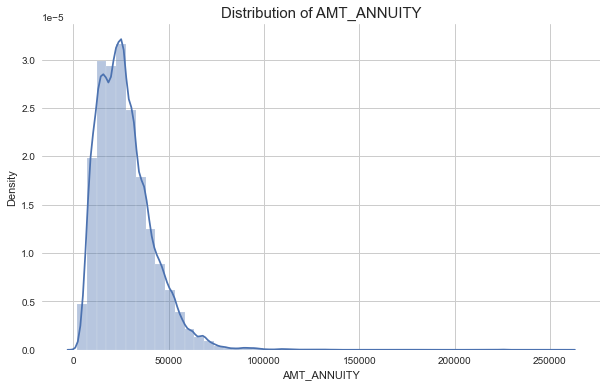

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,6])
sns.distplot(app_data['AMT_ANNUITY']) 
plt.title("Distribution of AMT_ANNUITY",fontdict={"size":15})
plt.show()

- distribution of AMT_ANNUITY is **approx. normal**

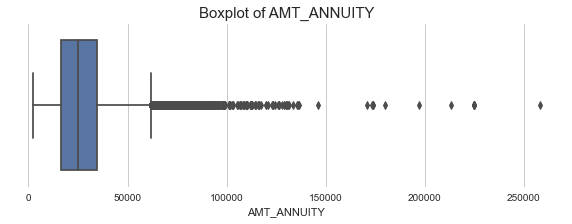

In [38]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(app_data['AMT_ANNUITY']) 
plt.title("Boxplot of AMT_ANNUITY",fontdict={"size":15})
plt.show()

- outliers are present in AMT_ANNUITY column beyond **1lakhs**

In [39]:
# looking outlier data
app_data[app_data.AMT_ANNUITY > 100000].sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
17948,120926,0,Cash loans,M,Y,N,2,783000.00,4050000.00,258025.50,4050000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.01,-15176,-201,-1529,-4722,1,1,1,1,0,1,4.00,2,2,THURSDAY,14,1,1,0,1,1,1,Industry: type 4,0.00,0.00,0.00,0.00,-5.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
34471,139943,0,Cash loans,F,N,N,2,270000.00,1800000.00,173704.50,1800000.00,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.01,-12177,-3508,-5208,-4330,1,1,0,1,0,0,4.00,2,2,TUESDAY,13,0,0,0,0,0,0,Self-employed,0.00,0.00,0.00,0.00,-2072.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,5.00
23556,127410,0,Cash loans,M,Y,N,0,900000.00,1800000.00,171040.50,1800000.00,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.01,-14759,-1684,-3563,-4493,1,1,1,1,1,0,2.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.00,0.00,0.00,0.00,-2422.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,2.00,0.00,4.00
26390,130682,0,Cash loans,F,Y,Y,0,450000.00,1389204.00,130018.50,1350000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.02,-21698,-1137,-1110,-2575,1,1,0,1,0,0,2.00,3,2,TUESDAY,6,0,0,0,0,0,0,Self-employed,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
21441,124981,0,Cash loans,F,N,Y,0,129600.00,1350000.00,126355.50,1350000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,Municipal apartment,0.01,-22908,365243,-9884,-3985,1,0,0,1,0,0,2.00,3,3,FRIDAY,10,0,0,0,0,0,0,XNA,2.00,1.00,2.00,0.00,-1038.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,0.00,7.00
32100,137221,0,Revolving loans,F,N,Y,1,405000.00,2250000.00,225000.00,2250000.00,Family,Commercial associate,Higher education,Married,House / apartment,0.02,-11285,-2508,-1106,-1057,1,1,0,1,0,0,3.00,2,2,THURSDAY,10,0,0,0,0,0,0,Other,0.00,0.00,0.00,0.00,-306.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
21880,125489,0,Cash loans,F,N,N,0,135000.00,1350000.00,130180.50,1350000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.02,-10946,-1853,-3328,-3328,1,1,0,1,1,0,2.00,2,2,MONDAY,11,0,0,0,0,0,0,Business Entity Type 1,0.00,0.00,0.00,0.00,-2050.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,2.00
11212,113064,0,Cash loans,M,N,Y,0,405000.00,1327500.00,126045.00,1327500.00,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.04,-12963,-4240,-6993,-1328,1,1,1,1,1,0,2.00,2,2,TUESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.00,0.00,0.00,0.00,-1898.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

- **all values seems valid** these are the borrowers with just  high AMT_ANNUITY, thus **leaving data as it is  using quantiles for analysis instead means.**

### DAYS_EMPLOYED

In [40]:
# looking and removing outliers of CNT_CHILDREN
app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].abs()// 365

app_data["YEARS_EMPLOYED"].describe(percentiles=[.25,.5,.75,.80,.90,.99])

count   49804.00
mean      183.62
std       380.75
min         0.00
25%         2.00
50%         6.00
75%        15.00
80%        24.00
90%      1000.00
99%      1000.00
max      1000.00
Name: YEARS_EMPLOYED, dtype: float64

- **median** YEARS_EMPLOYED is **6yrs**, where as **99% perecentile** is **1000yrs**
- **max** is **1000yrs**
- this seems **invalid data**, moving to further investigation.

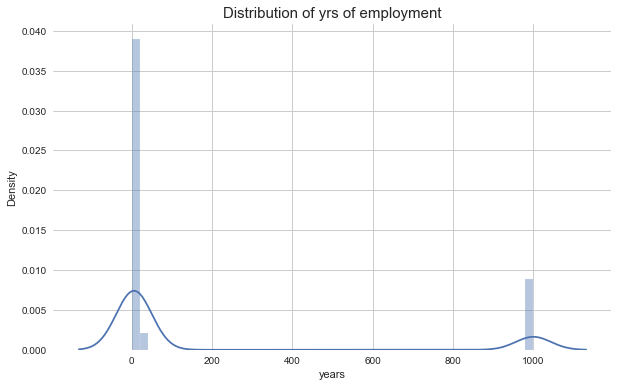

In [41]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,6])
sns.distplot(app_data['YEARS_EMPLOYED']) 
plt.title("Distribution of yrs of employment",fontdict={"size":15})
plt.xlabel("years")
plt.show()

- some invalid data are present as employment **can't** be of **1000 yrs**, finding these rows and removing

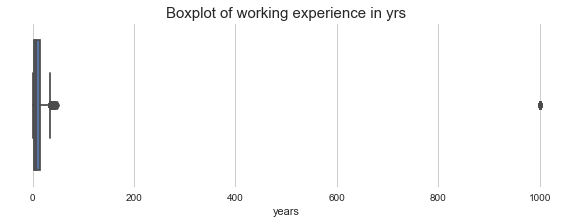

In [42]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(app_data['YEARS_EMPLOYED']) 
plt.title("Boxplot of working experience in yrs",fontdict={"size":15})
plt.xlabel("years")
plt.show()

- analysing boxplot we can see that there is an invalid data of 1000yr.

In [43]:
# looking outlier data
app_data[app_data.YEARS_EMPLOYED == 1000].sample(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED
43587,150456,0,Cash loans,F,Y,Y,0,67500.00,312768.00,13378.50,270000.00,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.04,-22817,365243,-5991,-4380,1,0,0,1,0,0,2.00,2,2,THURSDAY,11,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1000
967,101117,0,Cash loans,F,N,N,0,144000.00,585000.00,32796.00,585000.00,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.02,-18656,365243,-6456,-2155,1,0,0,1,1,0,1.00,2,2,TUESDAY,10,0,0,0,0,0,0,XNA,2.00,0.00,2.00,0.00,-2341.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,1000
28296,132886,0,Cash loans,F,N,N,0,67500.00,604152.00,26608.50,540000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,-23598,365243,-1976,-5072,1,0,0,1,0,0,2.00,2,2,THURSDAY,15,0,0,0,0,0,0,XNA,1.00,1.00,1.00,1.00,-305.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,4.00,1000
12073,114082,0,Cash loans,F,N,Y,0,135000.00,942300.00,27679.50,675000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.02,-21034,365243,-3985,-3110,1,0,0,1,0,0,2.00,2,2,SUNDAY,9,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,-109.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,2.00,1000
5475,106408,0,Cash loans,F,N,Y,0,202500.00,1350000.00,35743.50,1350000.00,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.03,-21496,365243,-609,-4276,1,0,0,1,0,0,1.00,2,2,WEDNESDAY,18,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,-2798.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,1000
35473,141087,0,Revolving loans,F,N,Y,0,157500.00,450000.00,22500.00,450000.00,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.04,-23143,365243,-3089,-4151,1,0,0,1,0,0,2.00,2,2,FRIDAY,17,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,-602.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00,1000
6769,107897,0,Cash loans,F,N,Y,0,58500.00,98910.00,7164.00,90000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.02,-22695,365243,-9878,-4726,1,0,0,1,0,0,2.00,2,2,SATURDAY,9,0,0,0,0,0,0,XNA,1.00,1.00,1.00,1.00,-23.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,4.00,1000
42063,148698,0,Cash loans,F,N,Y,0,75150.00,225000.00,16002.00,225000.00,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.02,-23830,365243,-856,-4342,1,0,0,1,0,0,1.00,3,3,WEDNESDAY,11,0,0,0,0,0,0,XNA,0.00,0.00,0.00,0.00,-1156.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,4.00,1000
8279,10

- thus **replacing** these data with invalid employment experience data by **median value.**

In [44]:
app_data["YEARS_EMPLOYED"] = app_data["YEARS_EMPLOYED"].replace(1000,app_data["YEARS_EMPLOYED"].median())

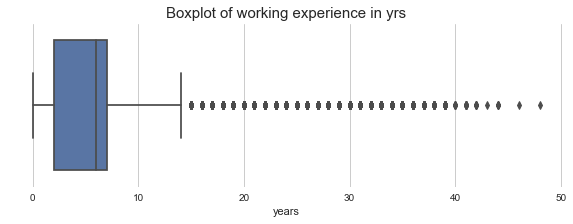

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(app_data['YEARS_EMPLOYED']) 
plt.title("Boxplot of working experience in yrs",fontdict={"size":15})
plt.xlabel("years")
plt.show()

### Handling outliers in application data
- removed client with **exceptionally high income** as it can distort our analysis for general trend.
- **replaced invalid** values of YEARS_EMPLOYED ie. **"1000yrs"** by **median** value.
- **rest** all outlier values **seems valid** as they are variables with just very **high skewed data**, thus leaving them as it is & **using quantiles** for analysis instead means.

### <font color='orange'>Handling Missing Values

### previous_application_data

In [46]:
# data overview
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# looking missing values
perc_missing_prev = round(prev_app_data.isnull().sum()/prev_app_data.shape[0]*100,3)
perc_missing_prev

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   21.18
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              50.40
AMT_GOODS_PRICE               21.49
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             50.40
RATE_INTEREST_PRIMARY         99.67
RATE_INTEREST_PRIVILEGED      99.67
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               48.49
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

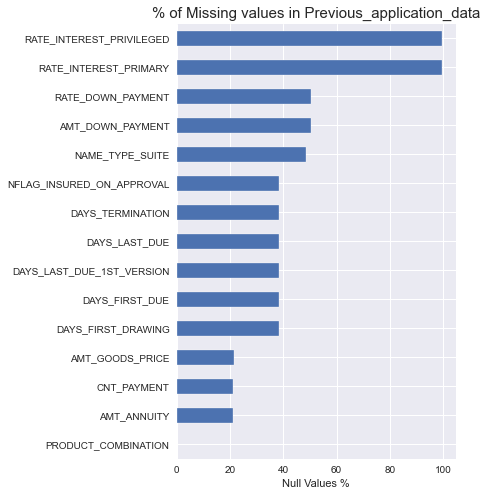

In [48]:
# visualising missing data
plt.style.use("seaborn")
plt.figure(figsize=(5,8))
perc_missing_prev[perc_missing_prev>0].sort_values(ascending=True).plot.barh()
plt.title("% of Missing values in Previous_application_data",fontdict=({"size":15}))
plt.xlabel("Null Values %")
plt.show()

- **removing columns** with null rows greater than **38%**

In [49]:
prev_app_data = prev_app_data.drop(["AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED",
                                    "NAME_TYPE_SUITE","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION",
                                    "DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"],axis=1)
prev_app_data.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                    10592
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_GOODS_PRICE                10744
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                    10592
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                8
dtype: int64

In [50]:
# looking numerical summary
prev_app_data[["AMT_ANNUITY","AMT_GOODS_PRICE","CNT_PAYMENT"]].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,39407.00,39255.00,39407.00
mean,15482.60,215141.42,15.56
std,14530.97,302499.27,13.99
min,0.00,0.00,0.00
25%,6122.84,49410.00,6.00
50%,10879.92,104017.50,12.00
75%,19669.14,225000.00,18.00
max,234478.39,3826372.50,60.00


- <b>median value of AMT_ANNUITY = 10879.92
- <b>median value of AMT_GOODS_PRICE = 104017.50
- <b>median value of CNT_PAYMENT = 12.00</b>
<br>imputing null rows with **median values.**

In [51]:
prev_app_data["AMT_ANNUITY"] = prev_app_data["AMT_ANNUITY"].fillna(prev_app_data["AMT_ANNUITY"].median())
prev_app_data["AMT_GOODS_PRICE"] = prev_app_data["AMT_GOODS_PRICE"].fillna(prev_app_data["AMT_GOODS_PRICE"].median())
prev_app_data["CNT_PAYMENT"] = prev_app_data["CNT_PAYMENT"].fillna(prev_app_data["CNT_PAYMENT"].median())

# removing rest insignificant null rows
prev_app_data = prev_app_data.dropna()

prev_app_data.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [52]:
# final shape
prev_app_data.shape

(49991, 26)

#### Removed null values
- **removed** all the **null values** from the previous_application_data dropping **11 columns** and **8 rows**
- all variable with missing values **greater than 38%** are **dropped.**
- and rest missing values are imputed with **median values** and **insignificant rows removed.**

### <font color='orange'>Handling Outlier Values

### previous_application_data

In [53]:
# looking for variables with outliers
prev_app_data.describe(percentiles=[.25,.50,.75,.90,.99])

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,49991.00,49991.00,49991.00,49991.00,49991.00,49991.00,49991.00,49991.00,49991.00,49991.00,49991.00
mean,1922166.48,278984.27,14508.13,168919.48,188573.06,191276.59,12.48,1.00,-900.19,401.71,14.80
std,535185.48,102779.60,13037.63,282218.00,308489.06,271912.15,3.33,0.06,786.57,17939.16,12.50
min,1000001.00,100007.00,0.00,0.00,0.00,0.00,0.00,0.00,-2922.00,-1.00,0.00
25%,1457780.50,189920.50,7189.74,22050.00,26055.00,63643.50,10.00,1.00,-1336.00,-1.00,10.00
50%,1920818.00,279264.00,10879.92,71594.55,78970.50,104017.50,12.00,1.00,-599.00,10.00,12.00
75%,2388404.00,368527.50,16258.97,180000.00,198171.00,180000.00,15.00,1.00,-292.00,100.00,14.00
90%,2663297.00,421837.00,29603.21,450000.00,502200.00,450000.00,17.00,1.00,-161.00,1000.00,30.00
99%,2827024.00,452963.10,65583.70,1350000.00,1475541.00,1350000.00,20.00,1.00,-16.00,3500.00,60.00
max,2845367.00,456254.00,234478.39,3826372.50,4104351.00,3826372.50,23.00,1.00,-2.00,4000000.00,60.00


In [54]:
numeric_cols2 = prev_app_data.select_dtypes(include=[float, int]).columns

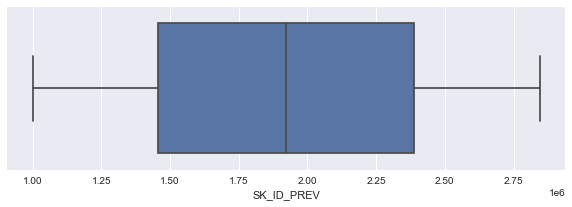

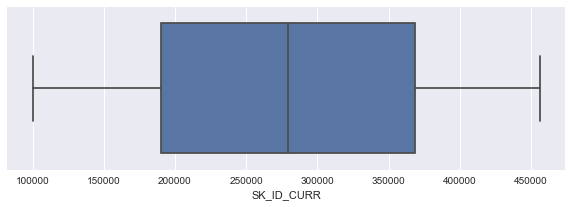

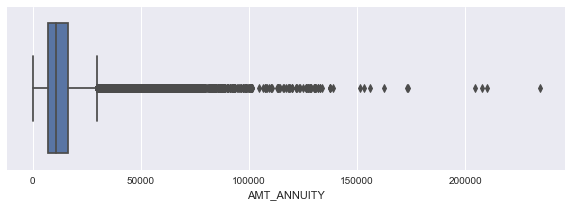

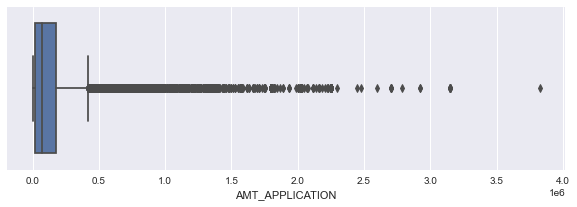

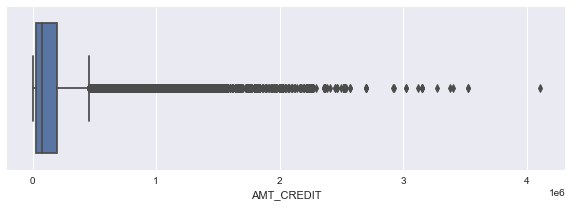

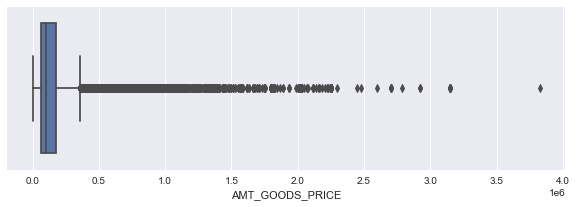

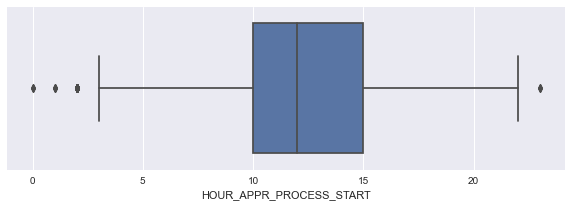

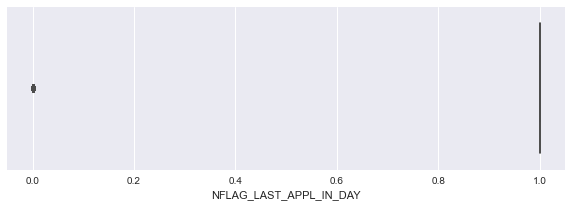

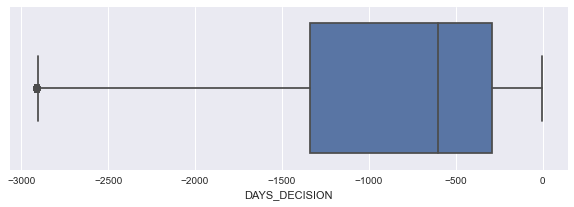

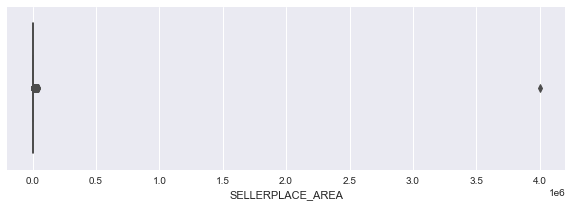

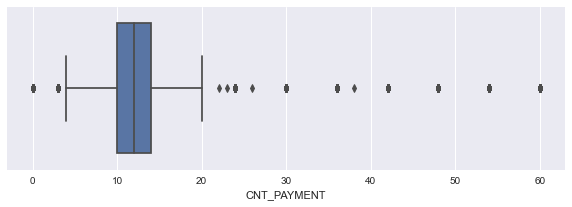

In [55]:
for i in numeric_cols2:
    plt.figure(figsize=(10,3))
    sns.boxplot(prev_app_data[i])
    

- <b>AMT_ANNUITY,  AMT_APPLICATION,  AMT_CREDIT,  AMT_GOODS_PRICE,  HOUR_APPR_PROCESS_START,  CNT_PAYMENT </b> columns have outlier values.

### AMT_ANNUITY

In [56]:
# looking and removing outliers of CNT_CHILDREN
prev_app_data["AMT_ANNUITY"].describe(percentiles=[.25,.5,.75,.90,.99])

count    49991.00
mean     14508.13
std      13037.63
min          0.00
25%       7189.74
50%      10879.92
75%      16258.97
90%      29603.21
99%      65583.70
max     234478.39
Name: AMT_ANNUITY, dtype: float64

- **median** AMT_ANNUITY is **~10k**, where as **99% perecentile** is **65k**
- **max** is **2lakhs**

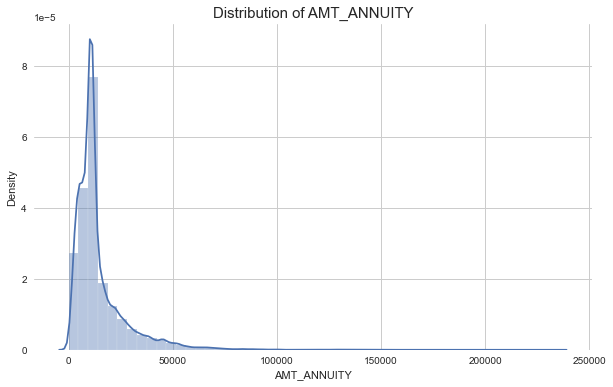

In [57]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,6])
sns.distplot(prev_app_data['AMT_ANNUITY']) 
plt.title("Distribution of AMT_ANNUITY",fontdict={"size":15})
plt.show()

- distribution is right skewed.

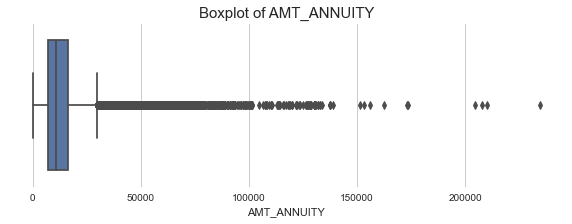

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(prev_app_data['AMT_ANNUITY']) 
plt.title("Boxplot of AMT_ANNUITY",fontdict={"size":15})
plt.show()

- outliers are present beyond **1.5lakhs**

In [59]:
# looking outlier data
prev_app_data[prev_app_data.AMT_ANNUITY > 150000].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00
mean,1939607.30,338182.80,182666.96,1783605.60,1819453.95,1783605.60,13.00,1.00,-644.70,9.60,11.20
std,538362.36,92967.00,29229.01,599000.02,633615.07,599000.02,3.62,0.00,325.80,26.96,3.79
min,1125559.00,186014.00,151535.43,630000.00,575235.00,630000.00,7.00,1.00,-1424.00,-1.00,4.00
25%,1515072.25,274734.25,157458.10,1631250.00,1670008.50,1631250.00,10.50,1.00,-696.25,-1.00,12.00
50%,1969511.00,367209.50,173248.61,1980000.00,2027045.25,1980000.00,12.50,1.00,-590.50,-1.00,12.00
75%,2396568.25,400928.00,207024.01,2160000.00,2228599.12,2160000.00,15.50,1.00,-534.75,-1.00,12.00
max,2675858.00,449559.00,234478.39,2475000.00,2533806.00,2475000.00,19.00,1.00,-207.00,84.00,18.00


- **all values seems valid** these are the borrowers with just  high AMT_ANNUITY, thus **leaving data as it is and keeping in mind to use quantiles or medians instead of average.**

### AMT_APPLICATION

In [60]:
# looking and removing outliers of CNT_CHILDREN
prev_app_data["AMT_APPLICATION"].describe(percentiles=[.25,.5,.75,.90,.99])

count     49991.00
mean     168919.48
std      282218.00
min           0.00
25%       22050.00
50%       71594.55
75%      180000.00
90%      450000.00
99%     1350000.00
max     3826372.50
Name: AMT_APPLICATION, dtype: float64

- **median** AMT_APPLICATION is **~70k**, where as **99% perecentile** is **13 lakhs**
- **max** is **38 lakhs**

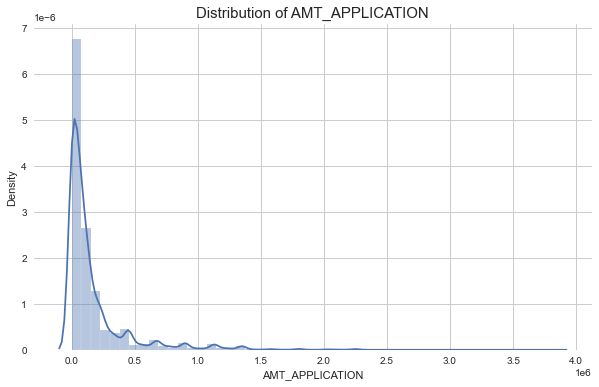

In [61]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,6])
sns.distplot(prev_app_data['AMT_APPLICATION']) 
plt.title("Distribution of AMT_APPLICATION",fontdict={"size":15})
plt.show()

- distribution is right skewed.

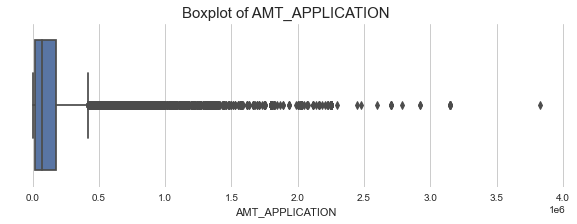

In [62]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(prev_app_data['AMT_APPLICATION']) 
plt.title("Boxplot of AMT_APPLICATION",fontdict={"size":15})
plt.show()

- outliers are present beyond **15 lakhs**

In [63]:
# looking outlier data
prev_app_data[prev_app_data.AMT_APPLICATION > 1500000].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,312.00,312.00,312.00,312.00,312.00,312.00,312.00,312.00,312.00,312.00,312.00
mean,1911838.51,285391.32,69283.34,1963152.40,2105428.38,1963152.40,12.57,1.00,-538.45,38.94,51.10
std,528402.91,102816.23,26594.45,362080.83,393941.77,362080.83,3.29,0.00,392.10,393.26,13.44
min,1002576.00,101164.00,17016.48,1512000.00,637560.00,1512000.00,3.00,1.00,-2680.00,-1.00,12.00
25%,1510395.25,199020.00,54417.72,1710000.00,1800000.00,1710000.00,10.00,1.00,-720.75,-1.00,42.00
50%,1873389.00,296228.00,63211.97,1804500.00,2025000.00,1804500.00,12.00,1.00,-487.00,-1.00,60.00
75%,2355072.75,374292.50,72857.72,2250000.00,2250000.00,2250000.00,15.00,1.00,-256.00,-1.00,60.00
max,2844896.00,456074.00,234478.39,3826372.50,4104351.00,3826372.50,20.00,1.00,-7.00,5921.00,60.00


- **all values seems valid** these are the borrowers with just  high AMT_APPLICAITON, thus **leaving data as it is and keeping in mind to use quantiles or medians instead of average.**

### AMT_CREDIT

In [64]:
# looking and removing outliers of CNT_CHILDREN
prev_app_data["AMT_CREDIT"].describe(percentiles=[.25,.5,.75,.90,.99])

count     49991.00
mean     188573.06
std      308489.06
min           0.00
25%       26055.00
50%       78970.50
75%      198171.00
90%      502200.00
99%     1475541.00
max     4104351.00
Name: AMT_CREDIT, dtype: float64

- **median** AMT_CREDIT is **~78k**, where as **99% perecentile** is **14Lakhs**
- **max** is **41 lakhs**

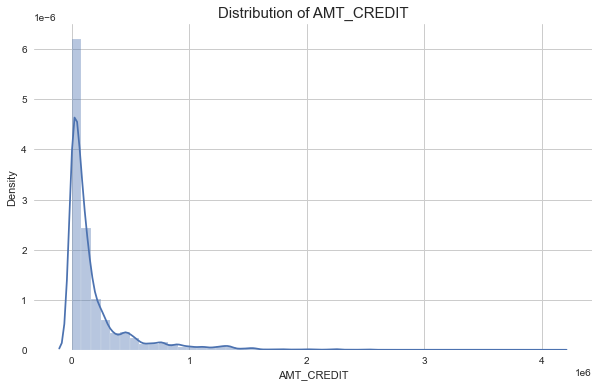

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,6])
sns.distplot(prev_app_data['AMT_CREDIT']) 
plt.title("Distribution of AMT_CREDIT",fontdict={"size":15})
plt.show()

- distribution is right skewed.

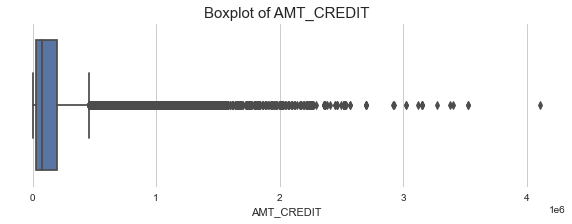

In [66]:
sns.set_style('whitegrid')
plt.figure(figsize=[10,3])
sns.boxplot(prev_app_data['AMT_CREDIT']) 
plt.title("Boxplot of AMT_CREDIT",fontdict={"size":15})
plt.show()

- outliers are present beyond **25 lakhs**

In [67]:
# looking outlier data
prev_app_data[prev_app_data.AMT_CREDIT > 2500000].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
mean,2009187.35,276985.10,79761.08,2526520.87,2760123.49,2526520.87,12.45,1.00,-598.14,126.29,57.06
std,490064.42,104092.77,26157.11,398134.72,372878.78,398134.72,3.67,0.00,423.39,845.66,9.01
min,1019179.00,101164.00,63637.33,2250000.00,2517300.00,2250000.00,3.00,1.00,-2247.00,-1.00,12.00
25%,1706867.00,206209.00,66536.87,2250000.00,2517300.00,2250000.00,10.00,1.00,-747.00,-1.00,60.00
50%,1908326.00,277385.00,70827.16,2250000.00,2522335.50,2250000.00,12.00,1.00,-534.00,-1.00,60.00
75%,2381389.00,358866.00,84822.93,2700000.00,3020760.00,2700000.00,16.00,1.00,-264.00,-1.00,60.00
max,2844896.00,450416.00,234478.39,3826372.50,4104351.00,3826372.50,19.00,1.00,-11.00,5921.00,60.00


- **all values seems valid** these are the borrowers with just  high AMT_CREDIT, thus **leaving data as it is and keeping in mind to use quantiles or medians instead of average.**
- we have dealt with all the **important variable** required for our analysis **moving further** and standardising invalid data.

## <span style="background-color:yellow">Standardising data and fixing invalid values

- Convert **DAYS_DECISION, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH** from negative to positive as days cannot be negative.

In [68]:
# Converting Negative days to positive days

days_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for i in days_col:
    app_data[i] = abs(app_data[i])
    
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648,2120,1,1,0,1,1,0,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,1
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186,291,1,1,0,1,1,0,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260,2531,1,1,1,1,1,0,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833,2437,1,1,0,1,0,0,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,8
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311,3458,1,1,0,1,0,0,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,8


## creating age group bucket

In [69]:
# converting age in years and Creating bucket for Age
app_data['CLIENT_AGE'] = app_data['DAYS_BIRTH'] // 365

# creating age bucket
bins = [0,20,30,40,50,100]
age_group = ['0-20','20-30','30-40','40-50','50 above']

app_data['AGE_GROUP']=pd.cut(app_data['CLIENT_AGE'],bins=bins,labels=age_group)

In [70]:
app_data.AGE_GROUP.value_counts()

50 above    15675
30-40       13530
40-50       12106
20-30        8493
0-20            0
Name: AGE_GROUP, dtype: int64

## creating income bucket 

In [71]:
# Binning income Columns to create a categorical column income_range

app_data['INCOME_TOTAL_IN_100K']=app_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
inc_range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_data['INCOME_RANGE']=pd.cut(app_data['INCOME_TOTAL_IN_100K'],bins,labels=inc_range)

app_data.INCOME_RANGE.value_counts()

100K-200K    25170
200k-300k    10564
0-100K       10353
300k-400k     2424
400k-500k      842
500k-600k      167
600k-700k      156
800k-900k       55
700k-800k       33
1M Above         4
900k-1M          2
Name: INCOME_RANGE, dtype: int64

## creating credit_amount bucket

In [72]:
# Creating bins for Credit amount
app_data['AMT_CREDIT_in_100k'] = app_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
credit_range = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT_in_100k'], bins=bins, labels=credit_range)

In [73]:
app_data.AMT_CREDIT_RANGE.value_counts()

200k-300k    8818
1M Above     8109
500k-600k    5531
400k-500k    5208
100K-200K    4895
300k-400k    4239
600k-700k    3894
800k-900k    3562
700k-800k    3046
900k-1M      1513
0-100K        989
Name: AMT_CREDIT_RANGE, dtype: int64

## <span style="background-color:yellow">ANALYSING DATA IMBALANCE

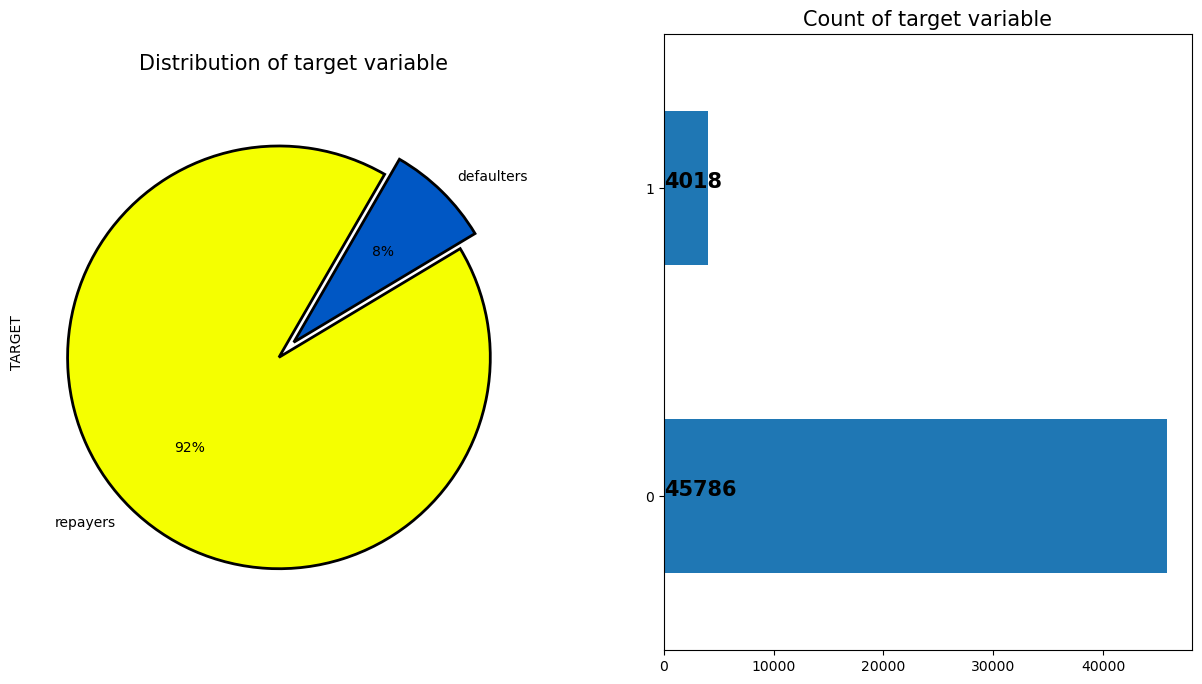

In [74]:
# plotting pie chart and bar plot of Target variable
plt.style.use("default")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
app_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayers","defaulters"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0])
plt.title("Distribution of target variable",fontdict={"size":15})

plt.subplot(1,2,2)
ax = app_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(app_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=15,horizontalalignment='left')

plt.title("Count of target variable", fontdict={"size":15})
plt.show()

- **Dafault rate** is **0.08** in the application_data
- application_data is **highly imbalanced** with **only 8%** data belongs to **dafault(1)** category and **92%** data are in **repayers(0)** category.

# <span style="background-color:yellow">EXPLORATORY DATA ANALYSIS

### Univariate Analysis of numerical columns

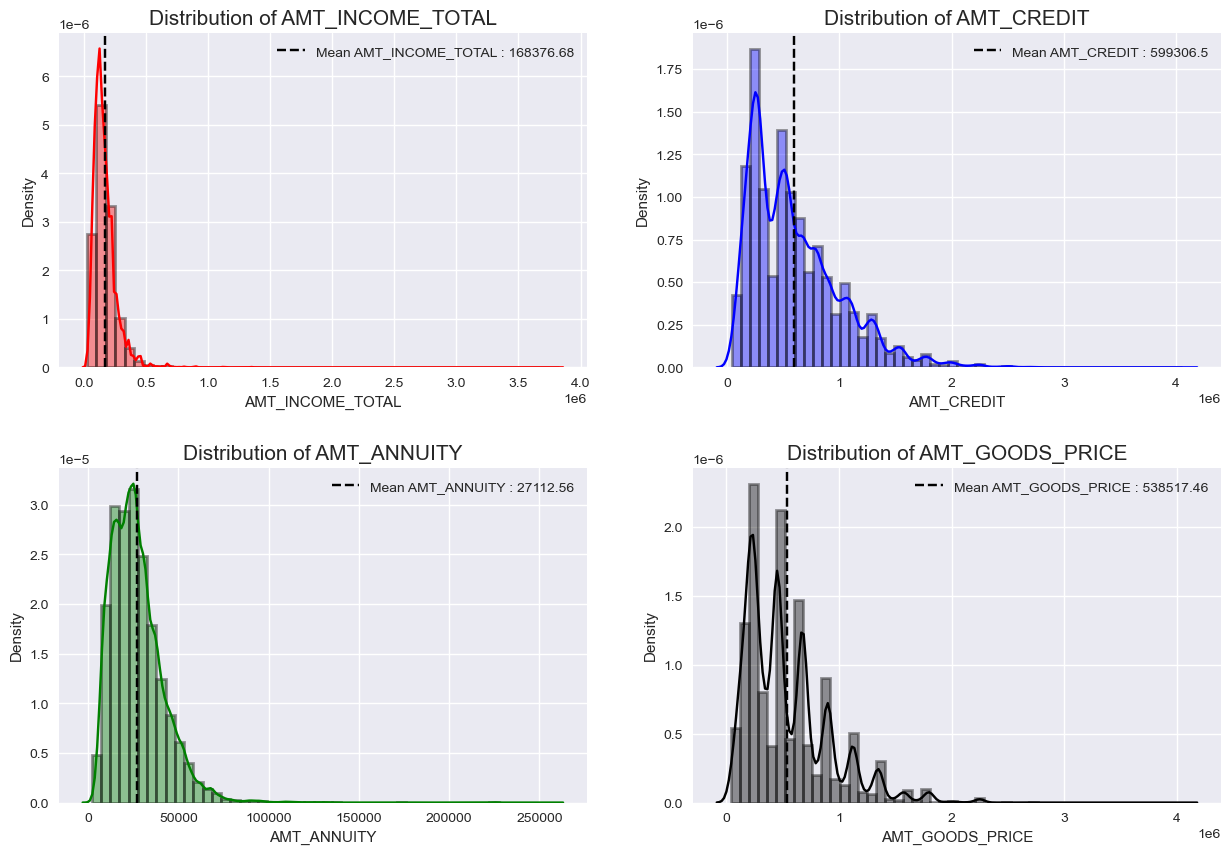

In [75]:
import itertools

num_cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(num_cols)
c = ["r","b","g","k"]

plt.figure(figsize=(15,10))
plt.style.use("seaborn")

#plotting histogram
for i,j,k in itertools.zip_longest(num_cols,range(length),c):
    plt.subplot(2,2,j+1)
    sns.distplot(app_data[app_data[i].notnull()][i],color=k, hist_kws={"edgecolor": "black", "linewidth": 2})
    plt.axvline(app_data[i].mean(),label = f"Mean {i} : {round(app_data[i].mean(),2)}",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(f"Distribution of {i}",fontdict={"size":15})
    plt.subplots_adjust(hspace = .3,wspace=0.2)


#### Inferences:
- Most no. of loans are given for goods price below 10 lakhs
- Most people have annuity below 50000 for the loan
- Credit amount of the loan is mostly less then 10 lakhs
- income of the client's are highly skewed, about 99% of the borrowers have income less than 5lakhs.

### Univariate Analysis of categorical columns

In [76]:
# looking for correlation of numerical variable with target variable`x
num_column  = app_data.select_dtypes(["object","string","category"]).columns

In [77]:
app_data[num_column].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE_GROUP,INCOME_RANGE,AMT_CREDIT_RANGE
count,49804,49804,49804,49804,49804,49804,49804,49804,49804,49804,49804,49804,49770,49804
unique,2,3,2,2,7,8,5,5,6,7,58,4,11,11
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,Business Entity Type 3,50 above,100K-200K,200k-300k
freq,45120,32712,32818,34634,40432,25926,35463,31968,44198,8707,11065,15675,25170,8818


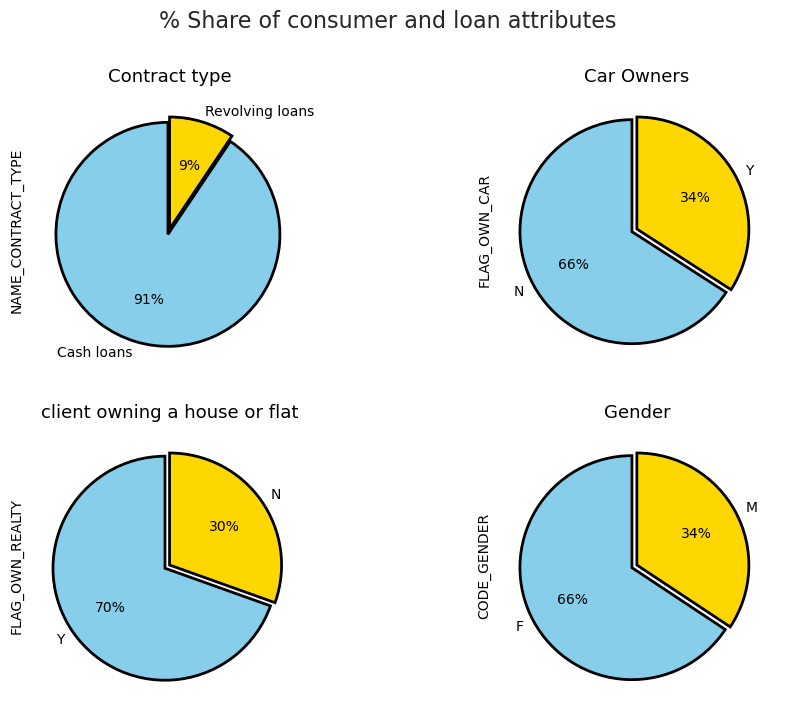

In [78]:
# plotting pie chart of binary categorical attributes

plt.figure(figsize=(12,8))
plt.suptitle("% Share of consumer and loan attributes",fontsize=16)
plt.style.use("default")

plt.subplot(221)
app_data["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0])
plt.title("Contract type",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.01)

plt.subplot(222)
app_data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0])
plt.title("Car Owners",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.01)

plt.subplot(223)
app_data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0])
plt.title("client owning a house or flat",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.01)

plt.subplot(224)
app_data[~(app_data["CODE_GENDER"]=="XNA")]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0])
plt.title("Gender",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.01)
plt.show()

#### Inferences:
- most of the contract type is cash loans(91%)
- only 34% clients are car owners
- majoirty clients(70%) have house or flat.
- and majority clients(66%) are females

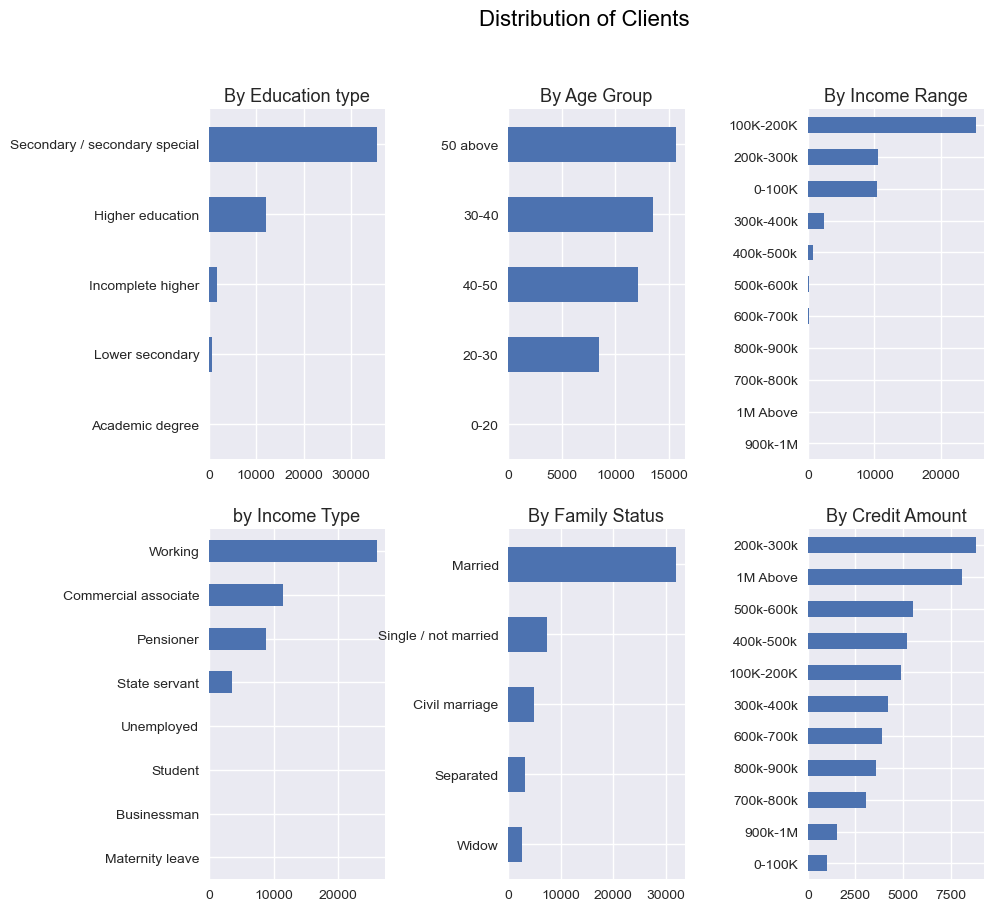

In [79]:
# plotting bar graphs for categorical variables

plt.figure(figsize=(10,10))
plt.suptitle("Distribution of Clients",fontsize=16)
plt.style.use("seaborn")


plt.subplot(231)
app_data["NAME_EDUCATION_TYPE"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("By Education type",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.7)

plt.subplot(232)
app_data["AGE_GROUP"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("By Age Group",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.7)

plt.subplot(233)
app_data["INCOME_RANGE"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("By Income Range",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.7)

plt.subplot(234)
app_data["NAME_INCOME_TYPE"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("by Income Type",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.7)

plt.subplot(235)
app_data["NAME_FAMILY_STATUS"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("By Family Status",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.7)

plt.subplot(236)
app_data["AMT_CREDIT_RANGE"].value_counts().sort_values(ascending=True).plot.barh()
plt.title("By Credit Amount",fontdict={"size":13})
plt.subplots_adjust(hspace=0.2, wspace=0.7)
plt.show()

### inferences
- secondary & Higher education are top education type of clients
- most clients are in the age group of 30-40 and 50 above
- most clients are in the range of 100-200k income
- most clients are credited amount in the range of 200k-300k
- working type and married type are top clients

## Bivariate Analysis

#### steps:
- num. attribute vs Target var
- categ. attribute vs Target var

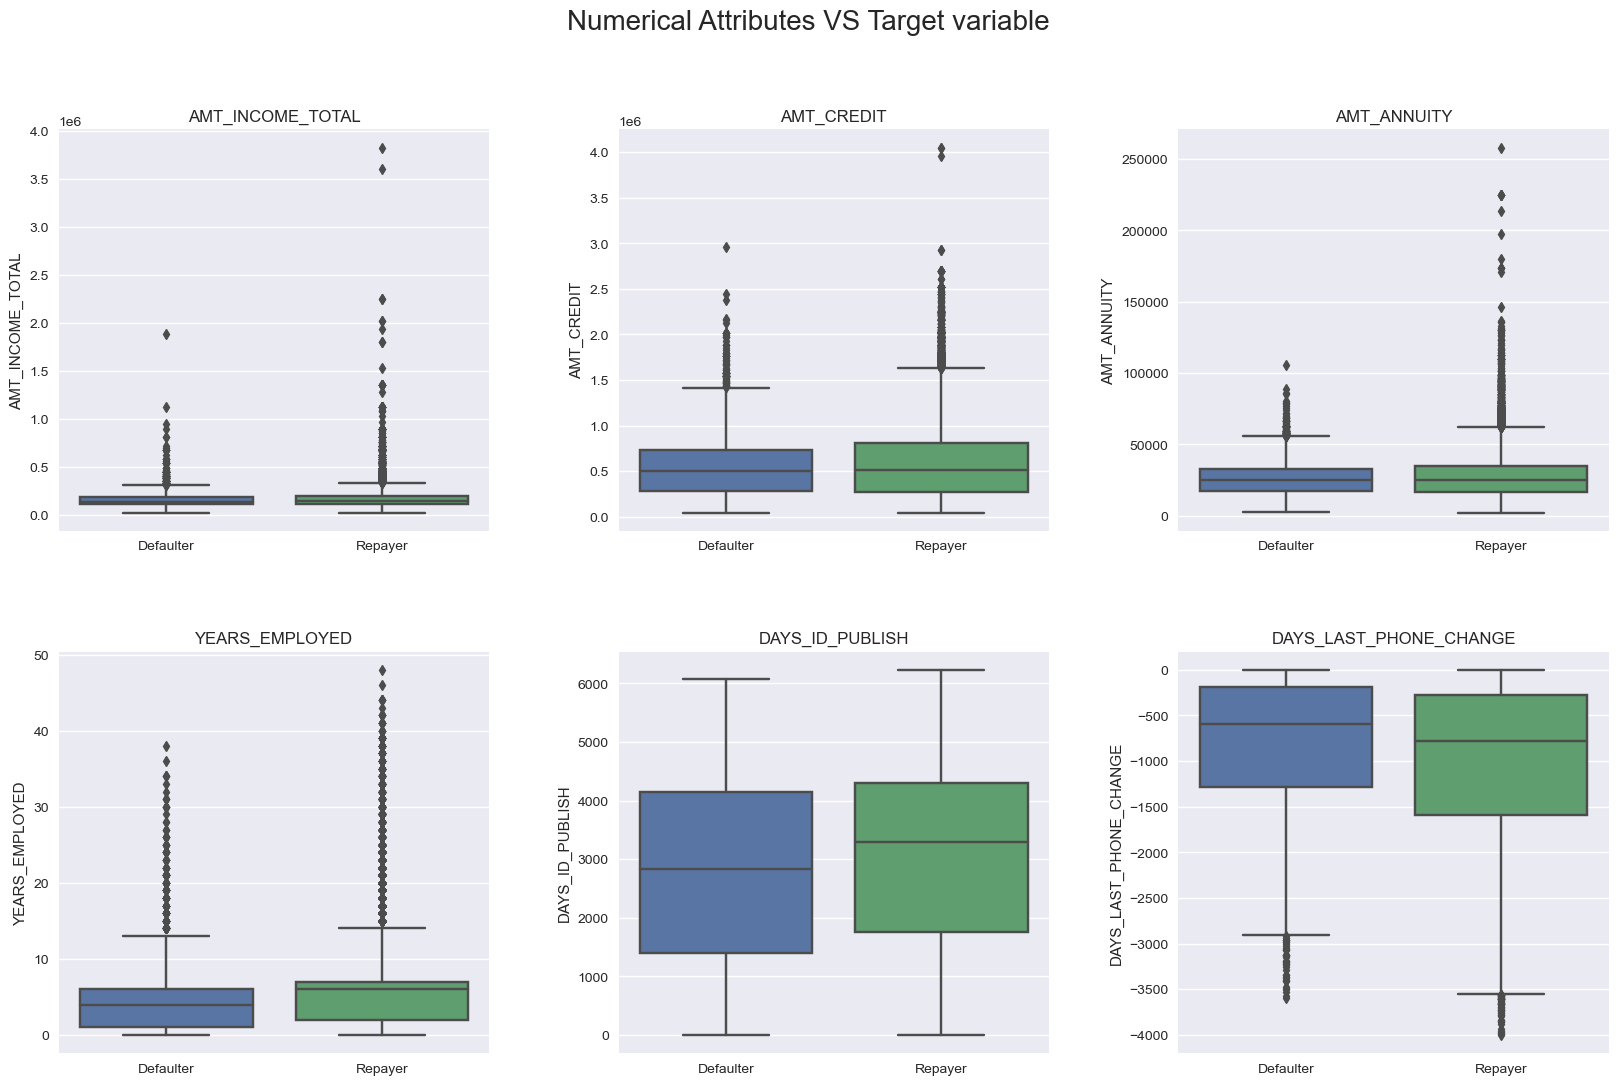

In [80]:
# plotting numerical attribute vs target attribute

app_data["Target_catg"] = app_data["TARGET"].map({1:"Defaulter",0:"Repayer"})
col_list = ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','YEARS_EMPLOYED', 'DAYS_ID_PUBLISH',
            'DAYS_LAST_PHONE_CHANGE']

plt.figure(figsize=(20,12))
plt.suptitle("Numerical Attributes VS Target variable",fontsize=20)
for i in enumerate(col_list):
    plt.subplot(2,3,i[0]+1)
    sns.boxplot(data=app_data,x=app_data["Target_catg"],y=app_data[i[1]])
    plt.title(i[1])
    plt.xlabel("")
    plt.subplots_adjust(hspace=0.3, wspace=.3)



#### Inferences
- median income of defaulters are same as repayers, very high income clients are not defaulters.
- median credit amount of defaulters are same as repayers, very high credit amount clients are not defaulters.
- defaulters have median annuity amount, employement yrs, daty last id updated values are slightly lower than repayers
- defaulters have median days last phone change value is higher than repayers

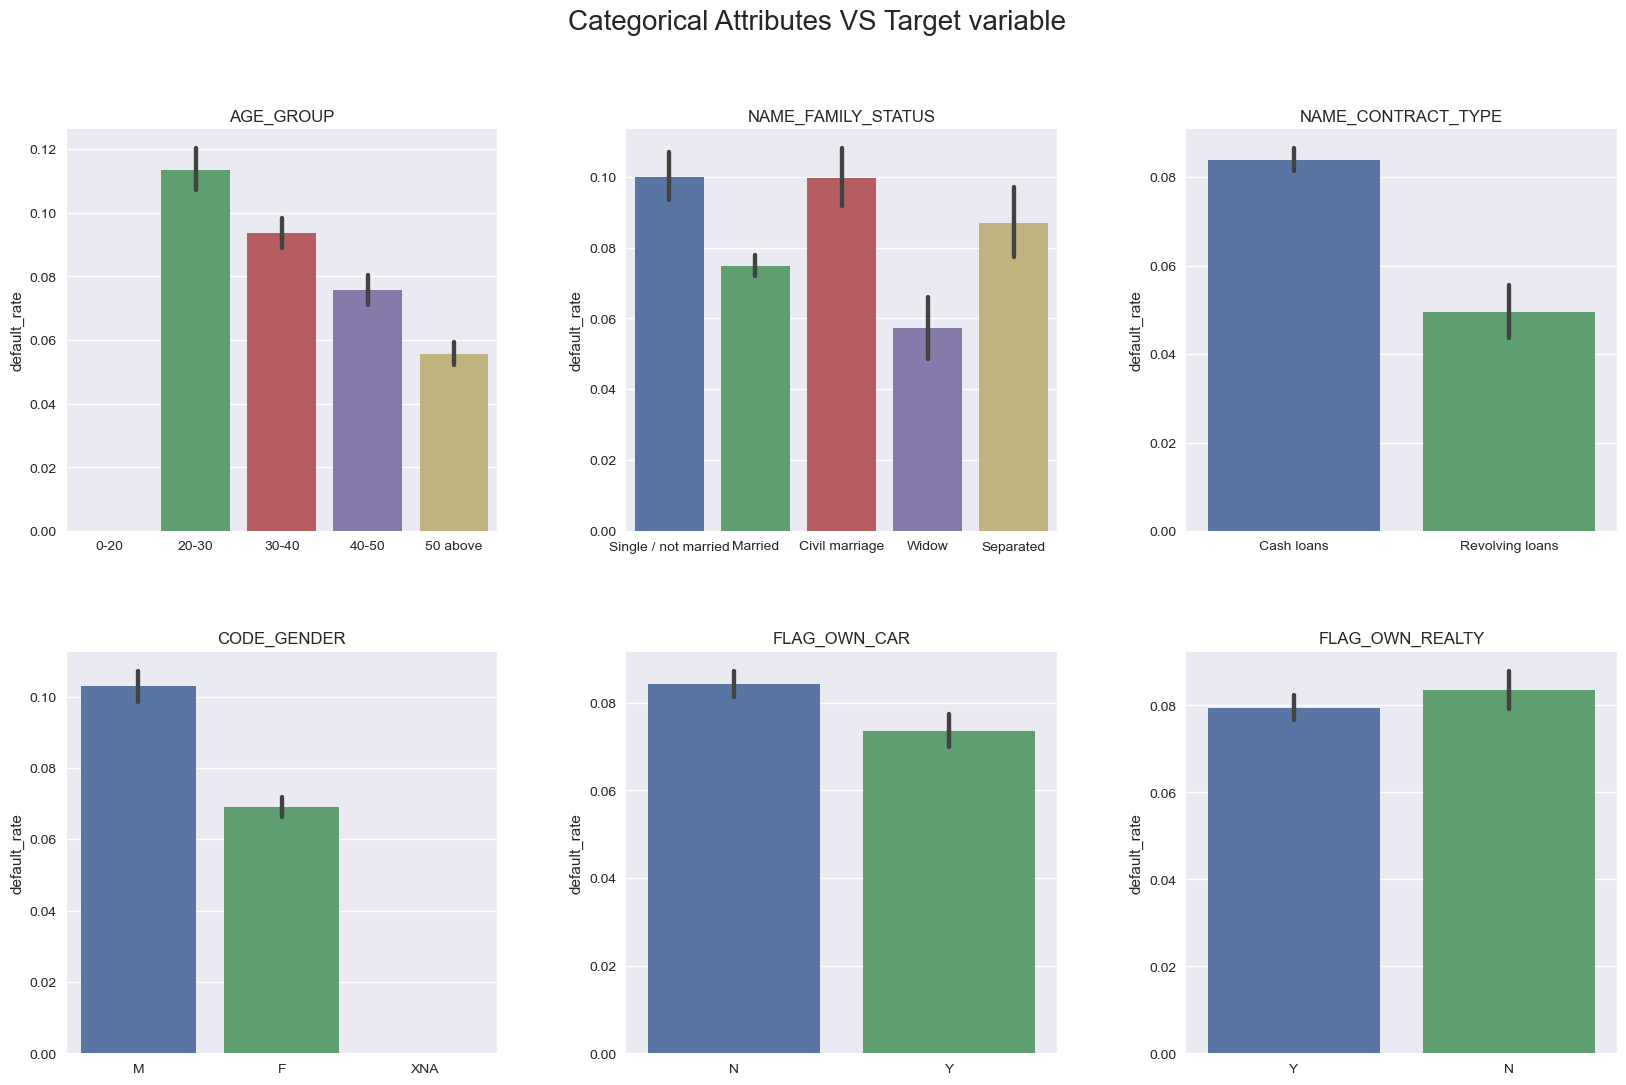

In [81]:
# plotting numerical attribute vs target attribute

col_list = ['AGE_GROUP', 'NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR',
            'FLAG_OWN_REALTY']

plt.figure(figsize=(20,12))
plt.suptitle("Categorical Attributes VS Target variable",fontsize=20)
for i in enumerate(col_list):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(data=app_data,x=app_data[i[1]],y=app_data["TARGET"],estimator=np.mean)
    plt.title(i[1])
    plt.ylabel("default_rate")
    plt.xlabel("")
    plt.subplots_adjust(hspace=0.3, wspace=.3)



#### Inferences
- clients in 20-30 age group have highest default rate
- civil married and single/not married clients have hight default rate
- cash loans contract type, people not owning car and house have higher default rate
- males have higher default rate than females.

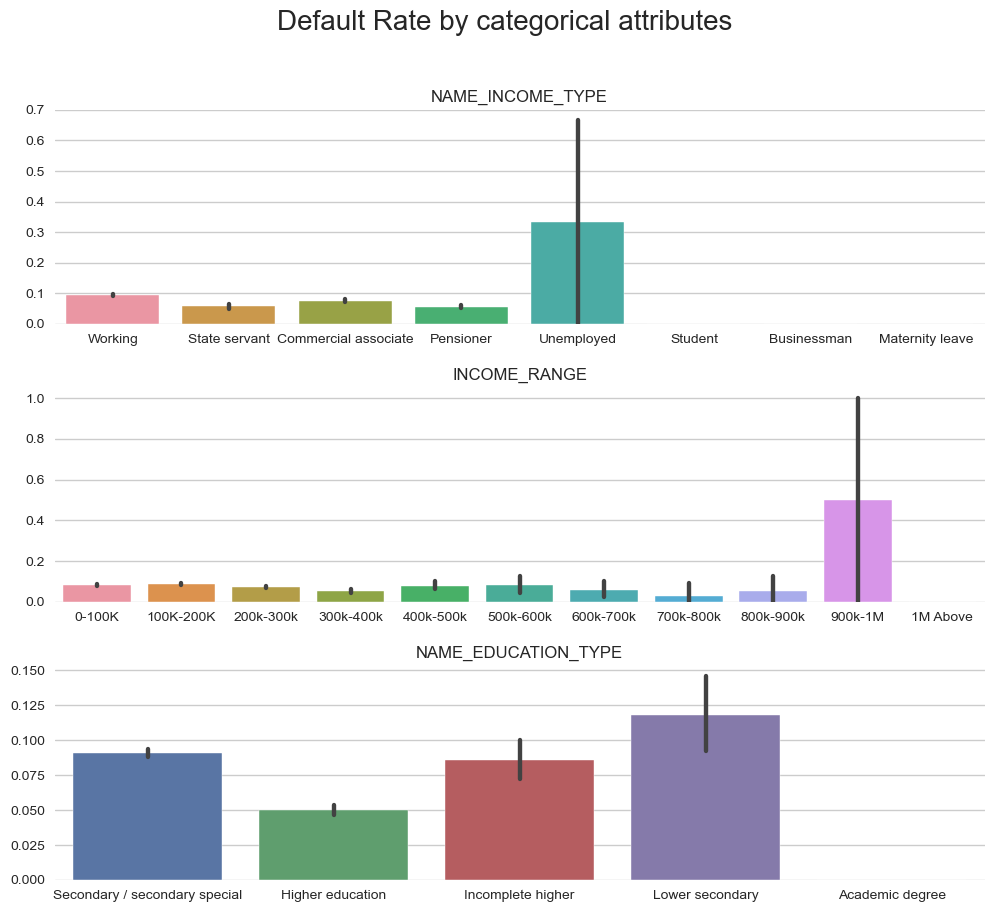

In [82]:
# plotting numerical attribute vs target attribute
sns.set_style('whitegrid')
col_list = ['NAME_INCOME_TYPE', 'INCOME_RANGE','NAME_EDUCATION_TYPE']

plt.figure(figsize=(12,10))
plt.suptitle("Default Rate by categorical attributes",fontsize=20)
for i in enumerate(col_list):
    plt.subplot(3,1,i[0]+1)
    sns.barplot(data=app_data,x=app_data[i[1]],y=app_data["TARGET"],estimator=np.mean)
    plt.title(i[1])
    plt.ylabel("")
    plt.xlabel("")
    plt.subplots_adjust(hspace=0.3, wspace=.08)

#### Inference
- unemployed clients have the highest default rate
- people having income in the categroy 900k-1m have the highest default rate which is unexpected.
- lower secondary and incomplete higher education type clients have higer default rate.

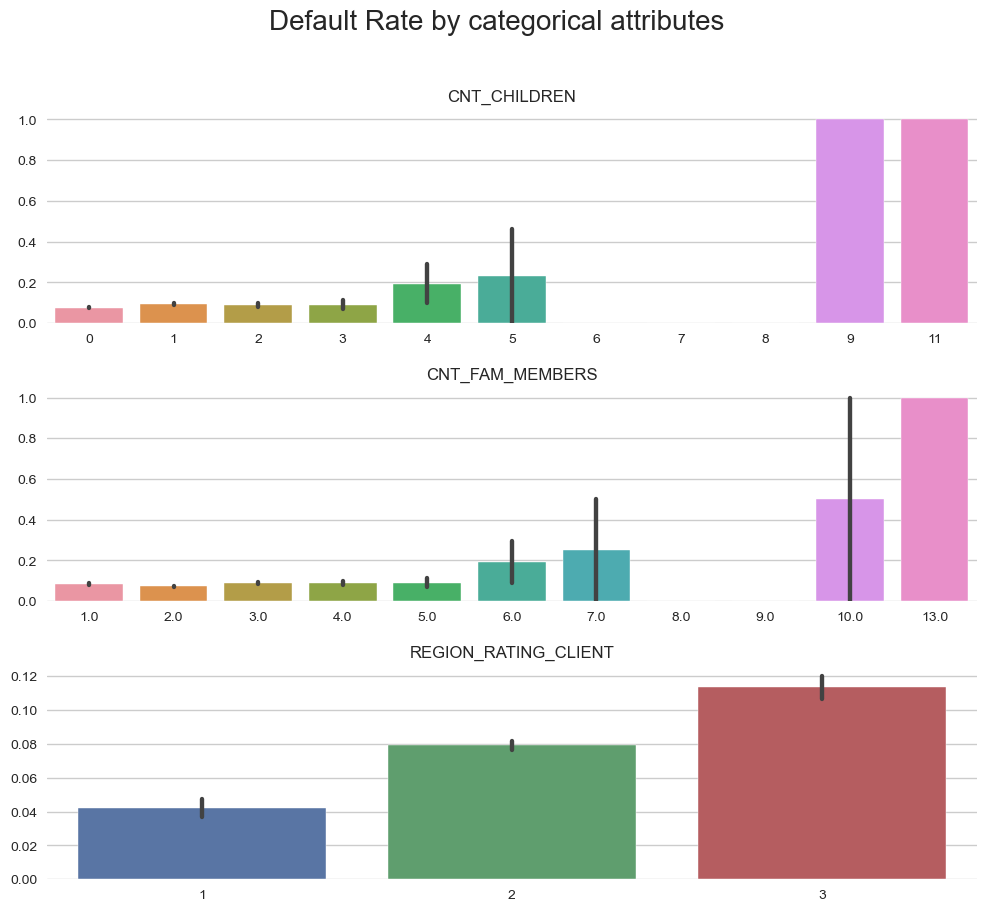

In [83]:
# plotting numerical attribute vs target attribute
sns.set_style('whitegrid')
col_list = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT']


plt.figure(figsize=(12,10))
plt.suptitle("Default Rate by categorical attributes",fontsize=20)
for i in enumerate(col_list):
    plt.subplot(3,1,i[0]+1)
    sns.barplot(data=app_data,x=app_data[i[1]],y=app_data["TARGET"],estimator=np.mean)
    plt.title(i[1])
    plt.ylabel("")
    plt.xlabel("")
    plt.subplots_adjust(hspace=0.3, wspace=.08)

#### inferences
- clients having higer children and family members are more likely to default.
- region_rating "3" clients has more default rate compared to rest. 

## joining applicaton data table and previous application data table using inner join 

In [84]:
# inner join
joint_df = app_data.merge(prev_app_data, on="SK_ID_CURR",how="inner")
joint_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_EMPLOYED,CLIENT_AGE,AGE_GROUP,INCOME_TOTAL_IN_100K,INCOME_RANGE,AMT_CREDIT_in_100k,AMT_CREDIT_RANGE,Target_catg,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311,3458,1,1,0,1,0,0,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,8,54,50 above,1.22,100K-200K,5.13,500k-600k,Repayer,2001242,Cash loans,16509.60,180000.00,180000.00,180000.00,SUNDAY,14,Y,1,XNA,Approved,-865,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Regional / Local,1200,Consumer electronics,18.00,high,Cash Street: high
1,100009,0,Cash loans,F,Y,Y,1,171000.00,1560726.00,41301.00,1395000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04,13778,3130,1213,619,1,1,0,1,1,0,3.00,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.00,0.00,1.00,0.00,-1562.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,1.00,2.00,8,37,30-40,1.71,100K-200K,15.61,1M Above,Repayer,1413109,Consumer loans,8996.76,98239.50,98239.50,98239.50,SATURDAY,18,Y,1,XAP,Approved,-449,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164,Consumer electronics,12.00,low_action,POS household without interest
2,100012,0,Revolving loans,M,N,Y,0,135000.00,405000.00,20250.00,405000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,14469,2019,14437,3992,1,1,0,1,0,0,1.00,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,2.00,0.00,2.00,0.00,-1673.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,5,39,30-40,1.35,100K-200K,4.05,400k-500k,Repayer,2243829,Consumer loans,3012.07,18720.00,23697.00,18720.00,THURSDAY,9,Y,1,XAP,Approved,-1673,XNA,XAP,New,Audio/Video,POS,XNA,Country-wide,42,Connectivity,12.00,high,POS mobile with interest
3,100026,0,Cash loans,F,N,N,1,450000.00,497520.00,32521.50,450000.00,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.02,11146,4306,114,2518,1,1,0,1,0,0,3.00,3,2,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.00,0.00,0.00,0.00,-468.00,0,1,0,0,0,0,0,0,0,0,

In [85]:
joint_df.shape

(6823, 103)

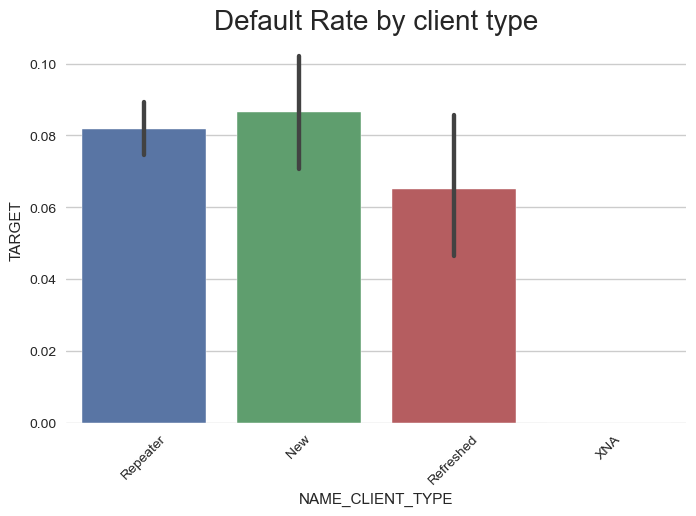

In [86]:
plt.figure(figsize=[8,5])
sns.barplot(data=joint_df,x=joint_df["NAME_CLIENT_TYPE"],y=joint_df["TARGET"],estimator=np.mean)
plt.title("Default Rate by client type",fontdict={"size":20})
plt.xticks(rotation=45)
plt.show()

- new clients type have more default rate

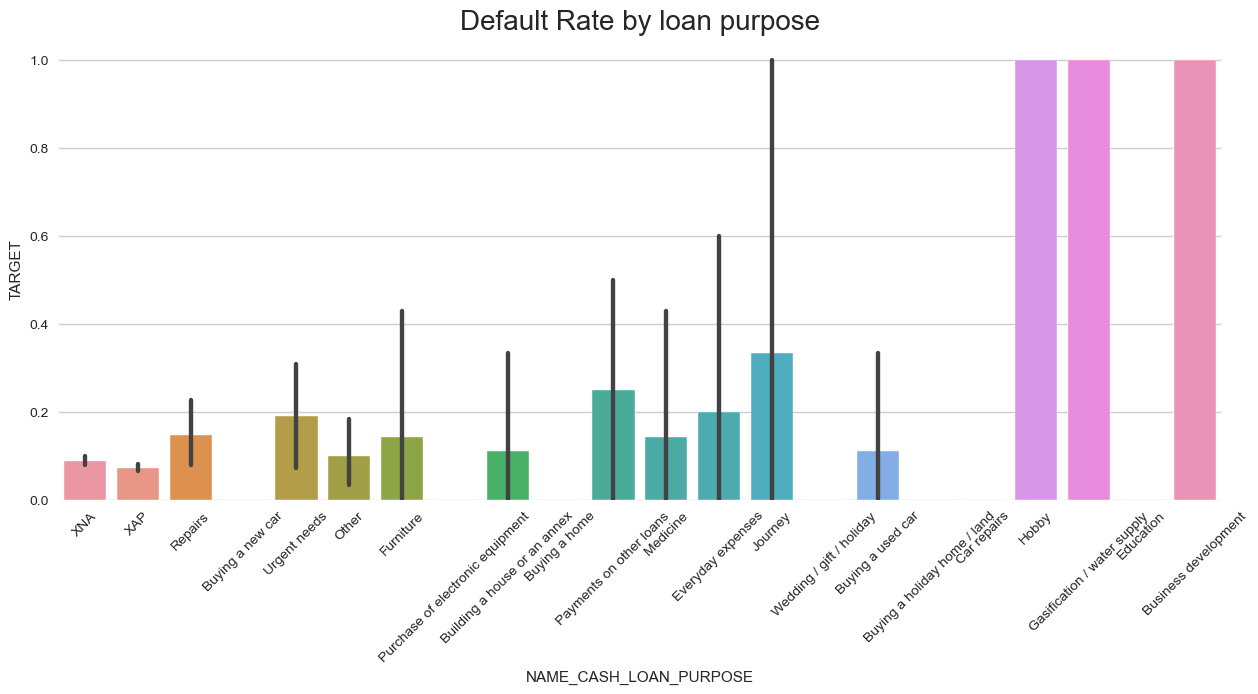

In [87]:
plt.figure(figsize=[15,6])
sns.barplot(data=joint_df,x=joint_df["NAME_CASH_LOAN_PURPOSE"],y=joint_df["TARGET"],estimator=np.mean)
plt.title("Default Rate by loan purpose",fontdict={"size":20})
plt.xticks(rotation=45)
plt.show()

- business development, hobby, journey loan purpose have higher default rate

## correlation between variables and the target variable

In [88]:
# correlation dataframe
corr = app_data.corrwith(app_data.TARGET).sort_values(ascending=False)
corr

TARGET                         1.00
REGION_RATING_CLIENT_W_CITY    0.07
REGION_RATING_CLIENT           0.07
DAYS_LAST_PHONE_CHANGE         0.06
REG_CITY_NOT_WORK_CITY         0.05
FLAG_DOCUMENT_3                0.04
DEF_60_CNT_SOCIAL_CIRCLE       0.04
DEF_30_CNT_SOCIAL_CIRCLE       0.04
FLAG_EMP_PHONE                 0.04
REG_CITY_NOT_LIVE_CITY         0.04
LIVE_CITY_NOT_WORK_CITY        0.03
CNT_CHILDREN                   0.03
FLAG_WORK_PHONE                0.02
OBS_30_CNT_SOCIAL_CIRCLE       0.01
OBS_60_CNT_SOCIAL_CIRCLE       0.01
CNT_FAM_MEMBERS                0.01
AMT_REQ_CREDIT_BUREAU_DAY      0.01
FLAG_DOCUMENT_2                0.01
REG_REGION_NOT_LIVE_REGION     0.01
AMT_REQ_CREDIT_BUREAU_YEAR     0.01
FLAG_CONT_MOBILE               0.01
AMT_REQ_CREDIT_BUREAU_WEEK     0.00
SK_ID_CURR                     0.00
AMT_REQ_CREDIT_BUREAU_HOUR     0.00
REG_REGION_NOT_WORK_REGION    -0.00
FLAG_DOCUMENT_9               -0.00
FLAG_DOCUMENT_17              -0.00
FLAG_EMAIL                  

In [89]:
# creating dataframe of top 10 highly correlated var with target variable
df1 = pd.DataFrame(corr[1:7])
df2 = pd.DataFrame(corr[-10:-2])
top10 = pd.concat([df1,df2],axis=0)
top10.columns = ["correlation with Target variable"]
print("correlation with Target variable")
top10

correlation with Target variable


,correlation with Target variable
REGION_RATING_CLIENT_W_CITY,0.07
REGION_RATING_CLIENT,0.07
DAYS_LAST_PHONE_CHANGE,0.06
REG_CITY_NOT_WORK_CITY,0.05
FLAG_DOCUMENT_3,0.04
DEF_60_CNT_SOCIAL_CIRCLE,0.04
REGION_POPULATION_RELATIVE,-0.04
AMT_GOODS_PRICE,-0.04
DAYS_EMPLOYED,-0.04
DAYS_REGISTRATION,-0.04


In [90]:
top10.loc[["CLIENT_AGE","DAYS_EMPLOYED"]] = np.NaN
top10 = top10.dropna()

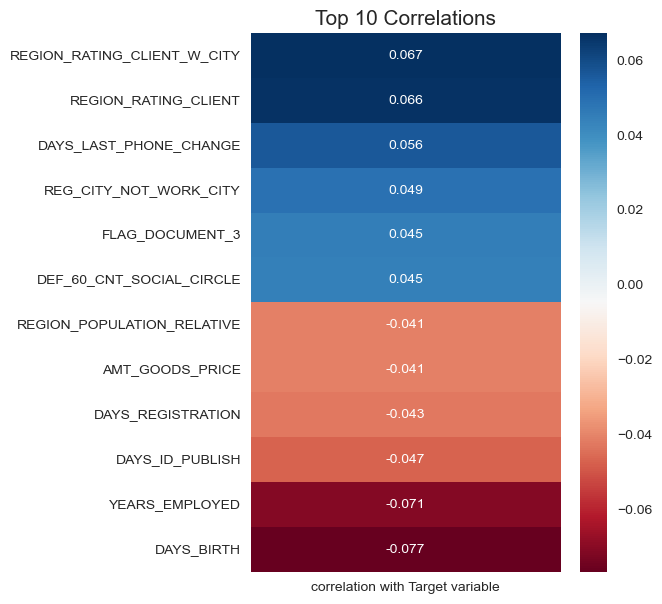

In [91]:
# heatmap
plt.figure(figsize=[5,7])
sns.heatmap(top10,annot=True,cmap="RdBu")
plt.title("Top 10 Correlations",fontdict={"size":15})
plt.show()